# FIT5149 Assessment 1 - Predicting the Critical Temperature of a Superconductor
#### Student Name: Pouria Ebrahimnezhad
#### Student ID: 30035678
#### Date: Sept 2019

Environment: R version 3.6.0 (2019-04-26) and Jupyter notebook

Libraries used:

* (ISLR)
* (ggplot2)
* (GGally)
* (gridExtra)
* (cowplot)
* (psych)
* (car)
* (corrplot)



# Introduction
In this task, we are going to analyze superconductor data from the Super- conducting Material Database maintained by Japan's National Institute for Ma-terials Science (NIMS). The aim is to build statistical models that can predict Tc based on the material's chemical properties.
We are Specically going to analyse a superconductor data set, which is based on real world material science data. The problem we are addressing is to predict the critical temperature Tc given some chemical properties of a material and to explain our prediction and the associated findings For example, de-scribing the key properties associated with the response variable.

## 1. Exploratory Data Analysis

In this part of the task I will try and explore the data to understand what attributes my dataset displays and how I should be addressing the task of modelling in relation to this dataset

In [1]:
# Importing some of the required packages
options(warn = -1) 
library(ISLR)
library(ggplot2)
library(GGally)
library(gridExtra)
library(cowplot)
library(psych)
library('car')
library('corrplot')
library('mgcv')

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha

Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:psych':

    logit

corrplot 0.84 loaded
Loading required package: nlme
This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.


In [2]:
# reading in the data 
smd_data = read.csv('train.csv')

In [3]:
dim(smd_data)

[1] 21263    82

In [4]:
head(smd_data)

number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
4,88.94447,57.86269,66.36159,36.11661,1.181795,1.0623955,122.9061,31.79492,51.96883,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.4330127,0.4370588,29
5,92.72921,58.51842,73.13279,36.39660,1.449309,1.0577551,122.9061,36.16194,47.09463,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.6324555,0.4686063,26
4,88.94447,57.88524,66.36159,36.12251,1.181795,0.9759805,122.9061,35.74110,51.96883,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.4330127,0.4446966,19
4,88.94447,57.87397,66.36159,36.11956,1.181795,1.0222909,122.9061,33.76801,51.96883,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.4330127,0.4409521,22
4,88.94447,57.84014,66.36159,36.11072,1.181795,1.1292237,122.9061,27.84874,51.96883,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.4330127,0.4288095,23
4,88.94447,57.79504,66.36159,36.09893,1.181795,1.2252028,122.9061,20.68746,51.96883,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.4330127,0.4103259,23


### 1.1 Data Summary & statistical qualities of the features

Now we take some steps in to exploring what we could initially see with the dataset, including exploring the features in terms of their distribution and statistics like standard deviation of each predictor and correlation between them 

In [5]:
summary(smd_data)

 number_of_elements mean_atomic_mass  wtd_mean_atomic_mass gmean_atomic_mass
 Min.   :1.000      Min.   :  6.941   Min.   :  6.423      Min.   :  5.321  
 1st Qu.:3.000      1st Qu.: 72.458   1st Qu.: 52.144      1st Qu.: 58.041  
 Median :4.000      Median : 84.923   Median : 60.697      Median : 66.362  
 Mean   :4.115      Mean   : 87.558   Mean   : 72.988      Mean   : 71.291  
 3rd Qu.:5.000      3rd Qu.:100.404   3rd Qu.: 86.104      3rd Qu.: 78.117  
 Max.   :9.000      Max.   :208.980   Max.   :208.980      Max.   :208.980  
 wtd_gmean_atomic_mass entropy_atomic_mass wtd_entropy_atomic_mass
 Min.   :  1.961       Min.   :0.0000      Min.   :0.0000         
 1st Qu.: 35.249       1st Qu.:0.9667      1st Qu.:0.7754         
 Median : 39.918       Median :1.1995      Median :1.1468         
 Mean   : 58.540       Mean   :1.1656      Mean   :1.0639         
 3rd Qu.: 73.113       3rd Qu.:1.4445      3rd Qu.:1.3594         
 Max.   :208.980       Max.   :1.9838      Max.   :1.9582  

Now let’s look at the standard deviation of all the predictors sorted so we can see which ones are likely to have higher impact in the model or may explain the variance in the output variable more than the others

In [6]:
sort(apply(smd_data[-82], 2, sd))

wtd_entropy_ElectronAffinity wtd_entropy_ThermalConductivity 
                      0.2859862                       0.3182484 
            wtd_entropy_Density     entropy_ThermalConductivity 
                      0.3197607                       0.3259762 
                wtd_entropy_fie                 entropy_Density 
                      0.3340176                       0.3423563 
       entropy_ElectronAffinity             entropy_atomic_mass 
                      0.3433911                       0.3649304 
         wtd_entropy_FusionHeat           entropy_atomic_radius 
                      0.3701247                       0.3754110 
             entropy_FusionHeat             wtd_entropy_Valence 
                      0.3759321                       0.3802906 
                    entropy_fie                 entropy_Valence 
                      0.3819346                       0.3931551 
        wtd_entropy_atomic_mass       wtd_entropy_atomic_radius 
                      0.4014235                       0.4071591 
                wtd_std_Valence                     std_Valence 
                      0.4555803                       0.4846763 
              wtd_range_Valence                    mean_Valence 
                      0.9781764                       1.0446115 
                  gmean_Valence               wtd_gmean_Valence 
                      1.0462572                       1.1748151 
               wtd_mean_Valence                   range_Valence 
                      1.1912487                       1.2423454 
             number_of_elements              wtd_std_FusionHeat 
                      1.4392947                       7.2882390 
                 std_FusionHeat                gmean_FusionHeat 
                      8.6716511                      10.0659006 
                mean_FusionHeat            wtd_range_FusionHeat 
                     11.3001880                      11.4140664 
           wtd_gmean_FusionHeat             wtd_mean_FusionHeat 
                     13.1340070                      14.2793355 
            wtd_std_atomic_mass                 std_atomic_mass 
                     19.9835443                      20.0354303 
             mean_atomic_radius                range_FusionHeat 
                     20.1472884                      20.3706197 
       wtd_std_ElectronAffinity            std_ElectronAffinity 
                     20.4292932                      21.7405209 
            gmean_atomic_radius               std_atomic_radius 
                     22.0909580                      22.8983962 
          wtd_std_atomic_radius           wtd_range_atomic_mass 
                     25.2945240                      26.9677519 
          mean_ElectronAffinity      wtd_range_ElectronAffinity 
                     27.7018896                      28.6204094 
         wtd_mean_atomic_radius          gmean_ElectronAffinity 
                     28.8015674                      29.0074249 
               mean_atomic_mass               gmean_atomic_mass 
                     29.6764973                      31.0302717 
     wtd_gmean_ElectronAffinity       wtd_mean_ElectronAffinity 
                     31.6484438                      32.2763870 
           wtd_mean_atomic_mass       gmean_ThermalConductivity 
                     33.4904062                      34.0595811 
        wtd_range_atomic_radius         wtd_gmean_atomic_radius 
                     35.0193564                      35.8378435 
          wtd_gmean_atomic_mass        mean_ThermalConductivity 
                     36.6510666                      38.5174847 
  wtd_gmean_ThermalConductivity   wtd_range_ThermalConductivity 
                     40.1911495                      43.1233171 
   wtd_mean_ThermalConductivity               range_atomic_mass 
                     45.5192560                      54.6268873 
         range_ElectronAffinity         std_ThermalConductivity 
                     58.7003266       

### 1.2 Distribution of the features

before moving on further I can see that I am dealing with 81 features which are mainly derived from 8 main properties, namely, Atomic Mass, First Ionization Energy, Atomic Radius, Density, Electron Affinity, Fusion Heat, Thermal Conductivity and Valence.

the rest of the features are statistical computed from these features and added to the dataset. this could mean I am dealing with features which most likely are heavily correlated in some cases and the question really becomes what subset of these fatures can really explain the variance in my output variable which is critical temperature. I need to also try to avoid collinearity between my features as this could make my model more difficult to interpret.

in order to explore this, I need to have a look at a few things. the variance of each feature and their distribution. correlation matrix of my features

I have used some readings from https://www.quora.com/How-does-skewness-impact-regression-model in this part

now ultimatley I will explore three different models to see how they each can help me in the prediction task as well as understanding how a subset of my dataset can help explain the variance in critical temperature.

If I am to use any form of linear Regression the following assumptions are to be made about the data:
* Linear relationship
* Multivariate normality
* No or little multicollinearity
* No auto-correlation
* Homoscedasticity (all variables have same variance)

Multivariate normality means that regression requires all its variables to be normal. By having skewed data, we violate the assumption of normality. and these violations may impact the regression

The violations can impact regression in the following ways:
Disproportionate influence on parameter estimates: Parameter estimation is based on the minimization of squared error. observations in skewed data will make a disproportionate effect on the parameter estimates. 
Due to the skewness of data Confidence Intervals (statistics) can be either too wide or too narrow as they are based on the assumption of normally distributed errors.

I will do my exploration for this by grouping my EDA for each type of statistics on the main 8 features. Starting with exploring the mean, followed by wtd_mean, etc.

I will also in late stages try and use variance inflation factor (VIF) to understand which features express multicollinearity and avoid selecting them in the subset of my final features

but first I will start off by visualising the distribution of my features. for this I will look at each property individualy

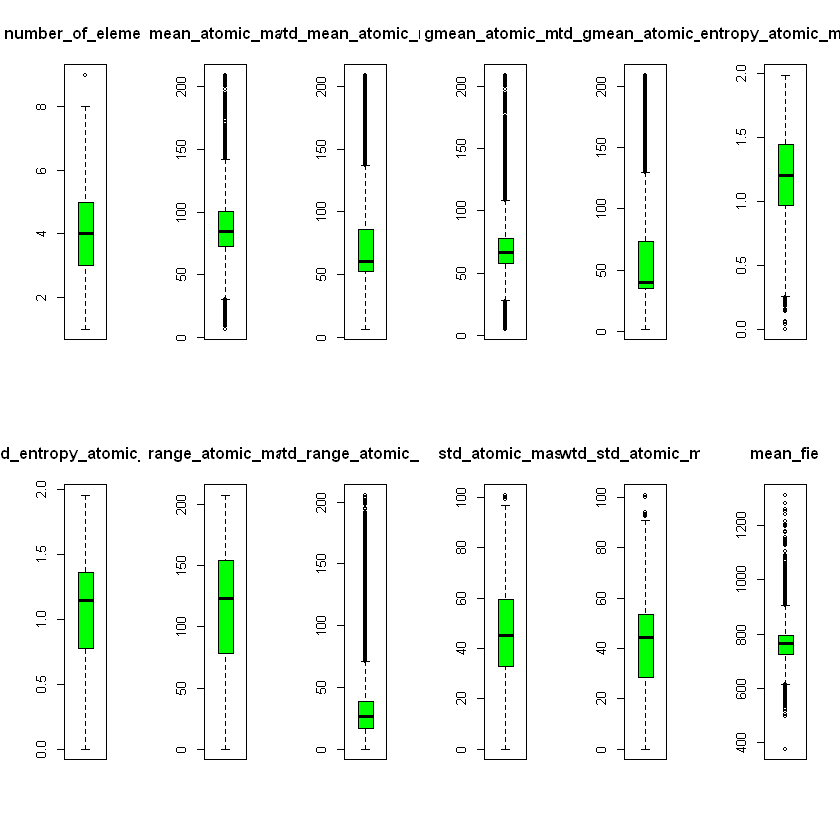

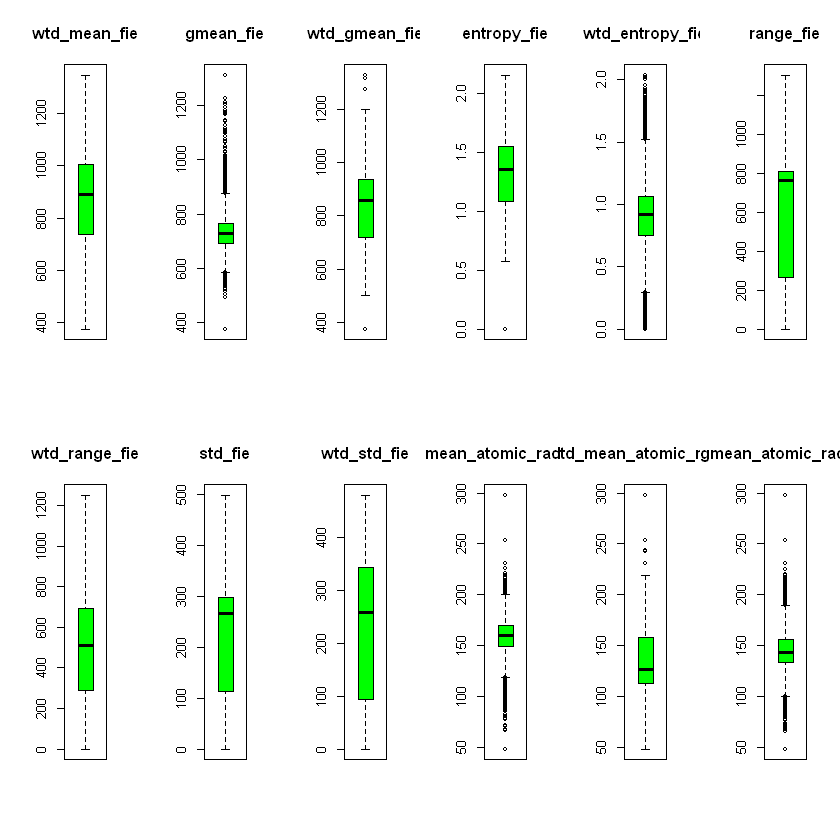

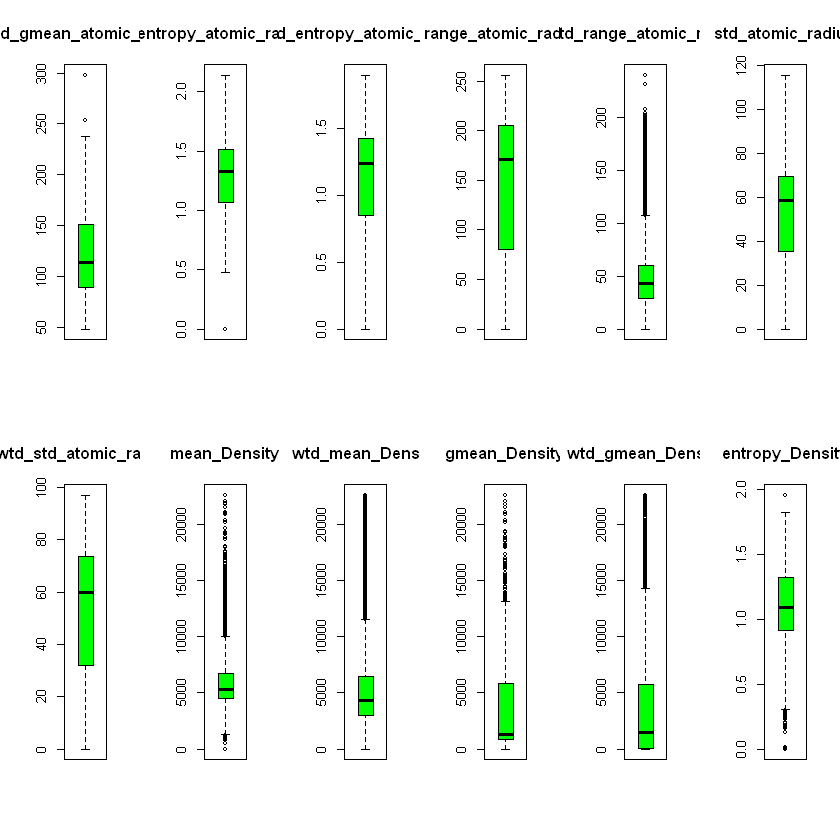

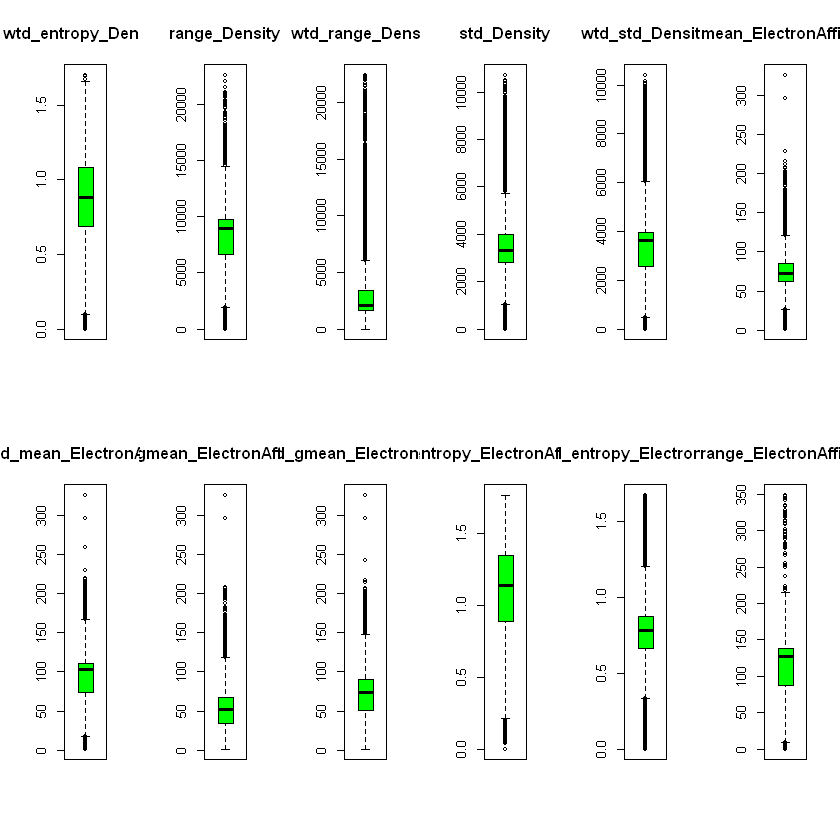

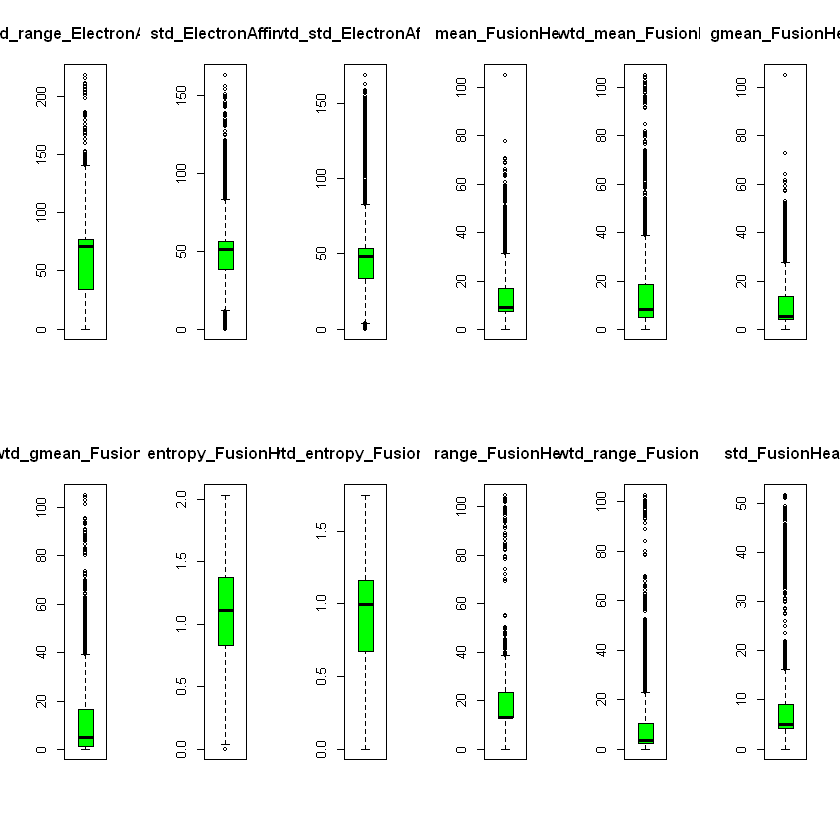

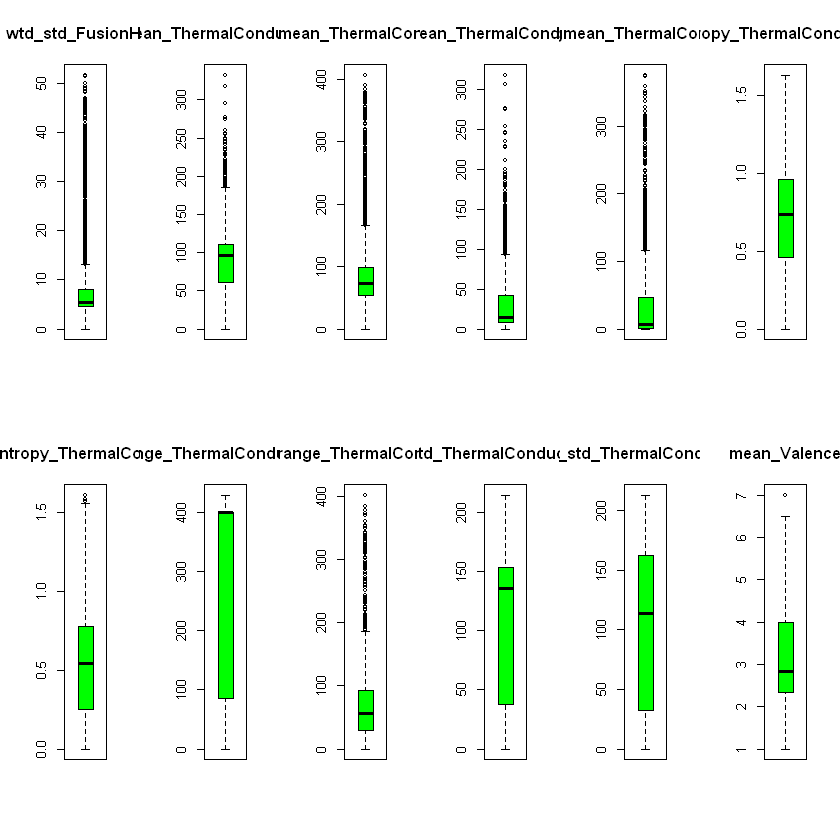

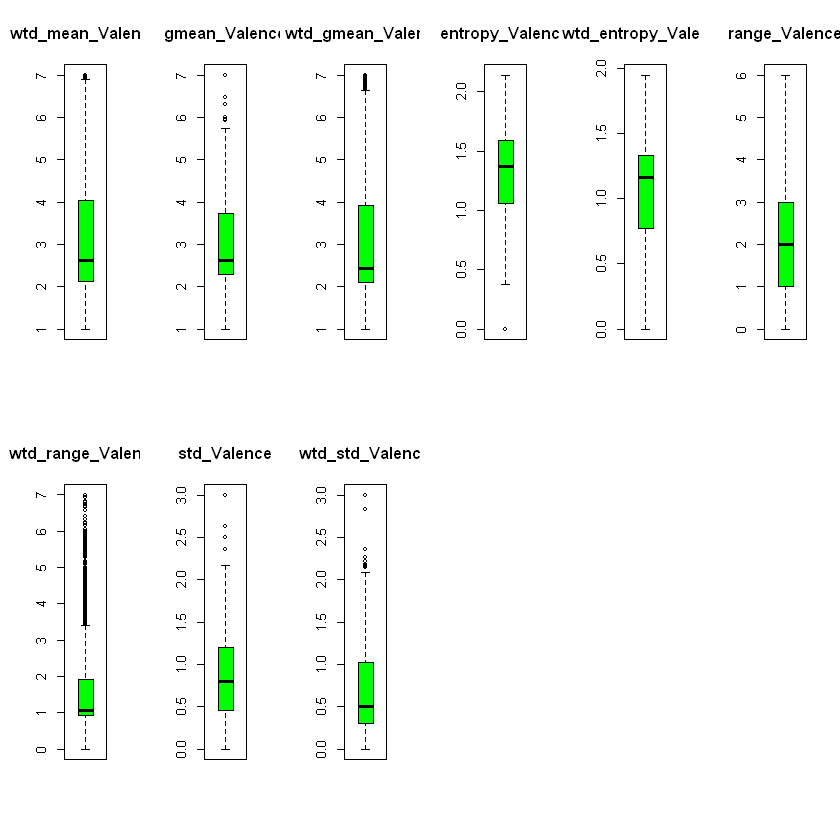

In [7]:
par(mfrow = c(2,6)) # 6 x 2 grid
for (i in 1:(length(smd_data) - 1)) {
        boxplot(smd_data[,i], main = names(smd_data[i]), type="l", col = 'green') 
}

#### 1.2.1 Mean distribution of various features

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


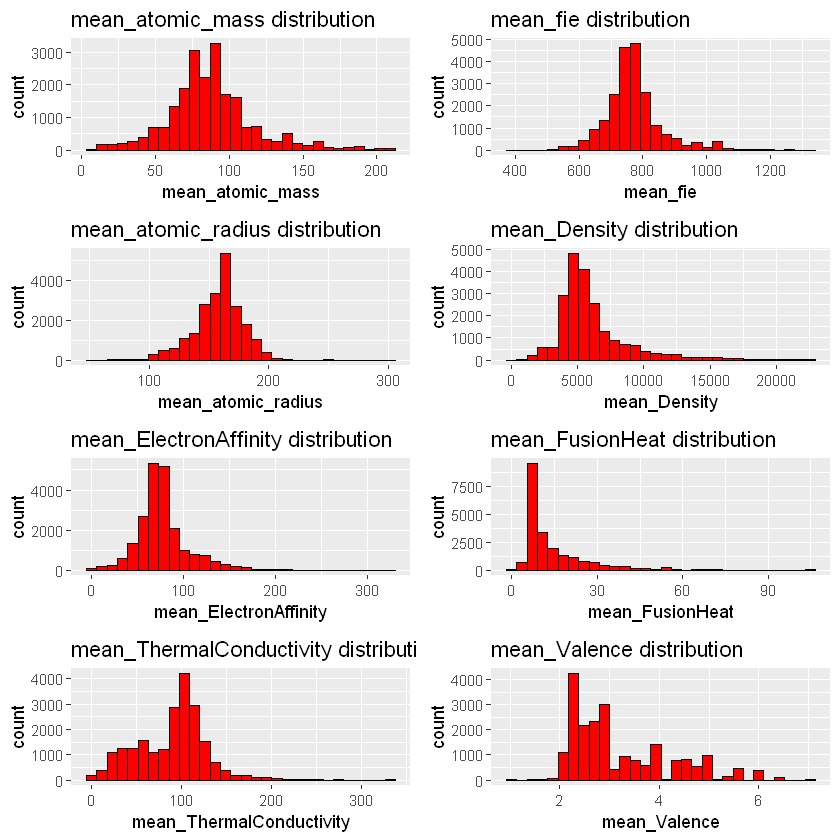

In [8]:
p1<-ggplot(aes(x=mean_atomic_mass), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('mean_atomic_mass distribution')
p2<-ggplot(aes(x=mean_fie), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('mean_fie distribution')
p3<-ggplot(aes(x=mean_atomic_radius), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('mean_atomic_radius distribution')
p4<-ggplot(aes(x=mean_Density), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('mean_Density distribution')
p5<-ggplot(aes(x=mean_ElectronAffinity), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('mean_ElectronAffinity distribution')
p6<-ggplot(aes(x=mean_FusionHeat), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('mean_FusionHeat distribution')
p7<-ggplot(aes(x=mean_ThermalConductivity), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('mean_ThermalConductivity distribution')
p8<-ggplot(aes(x=mean_Valence), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('mean_Valence distribution')

grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, ncol = 2)

looking at the variance or standard deviation, the mean_valence seems to have a very low Std-dev compared to the other which could mean that this feature may not be able to contribute to explaining some of the variance of the output variable, however let’s explore this more...

I will plot the mean_valence with the critical_temp to see what I can see


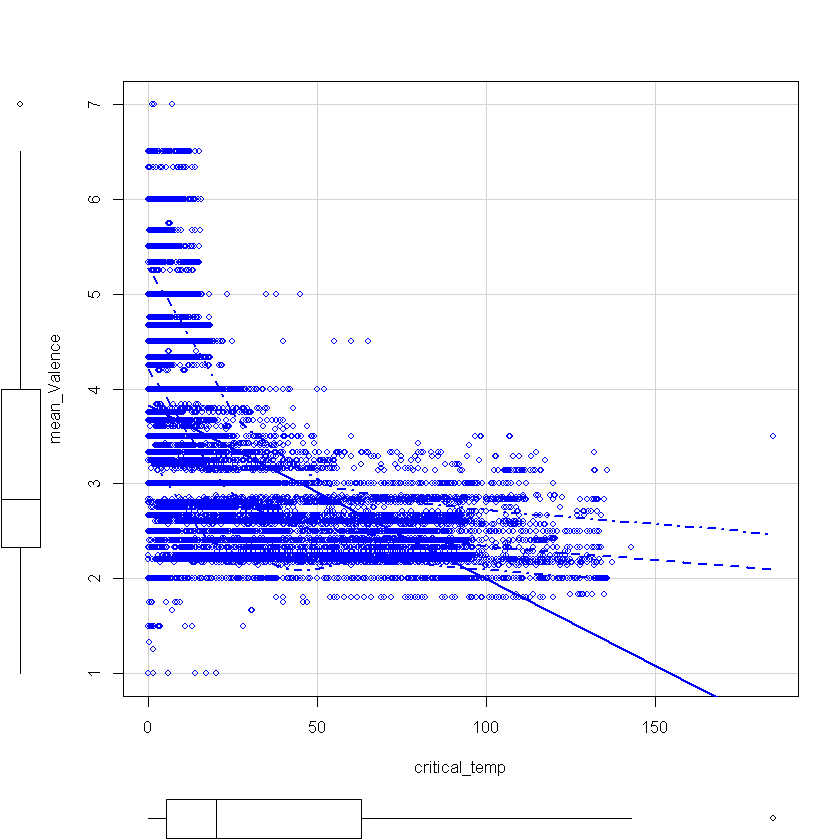

In [9]:
scatterplot(mean_Valence~critical_temp, data = smd_data)

What is visible here is that the mean valence seems to be showing properties of a categorical feature and there seems to be a relationship between the critical_temp and this feature, the higher temperatures are mostly of mean_valence of 2 to 3.
this could be important in our model and hence indicates that choosing the features based on their std-dev value could not be wise in all cases.

let's now explore the rest of the features

#### 1.2.2 Weigthed Mean distribution

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


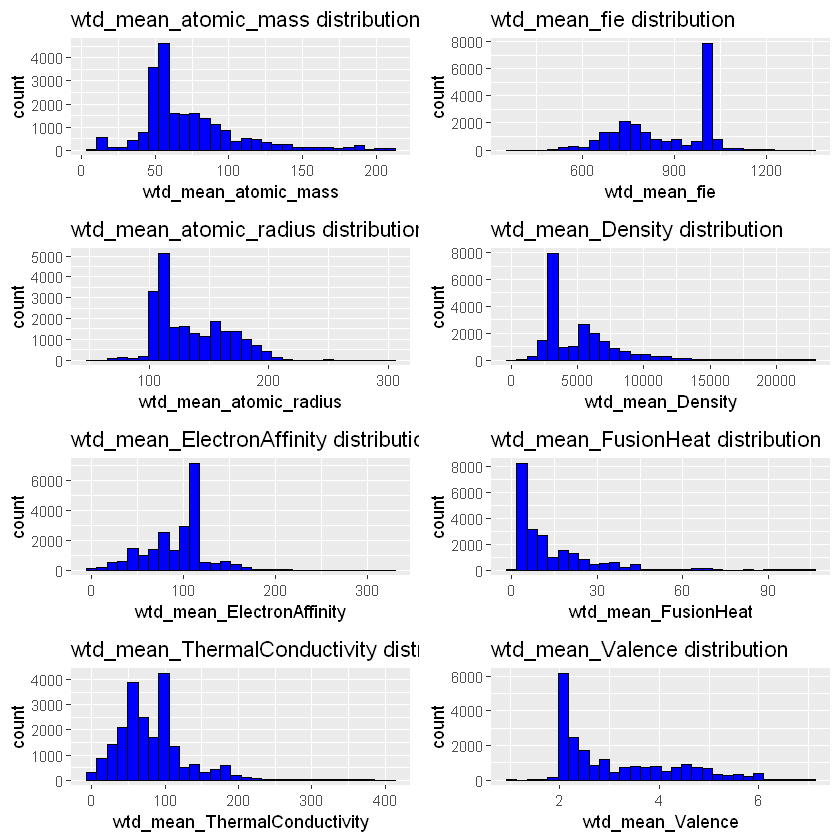

In [10]:
p1<-ggplot(aes(x=wtd_mean_atomic_mass), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "blue") + 
    ggtitle('wtd_mean_atomic_mass distribution')
p2<-ggplot(aes(x=wtd_mean_fie), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "blue") + 
    ggtitle('wtd_mean_fie distribution')
p3<-ggplot(aes(x=wtd_mean_atomic_radius), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "blue") + 
    ggtitle('wtd_mean_atomic_radius distribution')
p4<-ggplot(aes(x=wtd_mean_Density), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "blue") + 
    ggtitle('wtd_mean_Density distribution')
p5<-ggplot(aes(x=wtd_mean_ElectronAffinity), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "blue") + 
    ggtitle('wtd_mean_ElectronAffinity distribution')
p6<-ggplot(aes(x=wtd_mean_FusionHeat), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "blue") + 
    ggtitle('wtd_mean_FusionHeat distribution')
p7<-ggplot(aes(x=wtd_mean_ThermalConductivity), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "blue") + 
    ggtitle('wtd_mean_ThermalConductivity distribution')
p8<-ggplot(aes(x=wtd_mean_Valence), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "blue") + 
    ggtitle('wtd_mean_Valence distribution')

grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, ncol = 2)

We can observe that the Wtd_mean in most features, doesn't seem to show normality property which could mean that using these features in a regression model could have some complications or we may need to transform them using log() to change the distribution of features to normal distributed, lets check this for those heavily skewed distributions above wtd_mean_valence and wtd_mean_FusionHeat

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


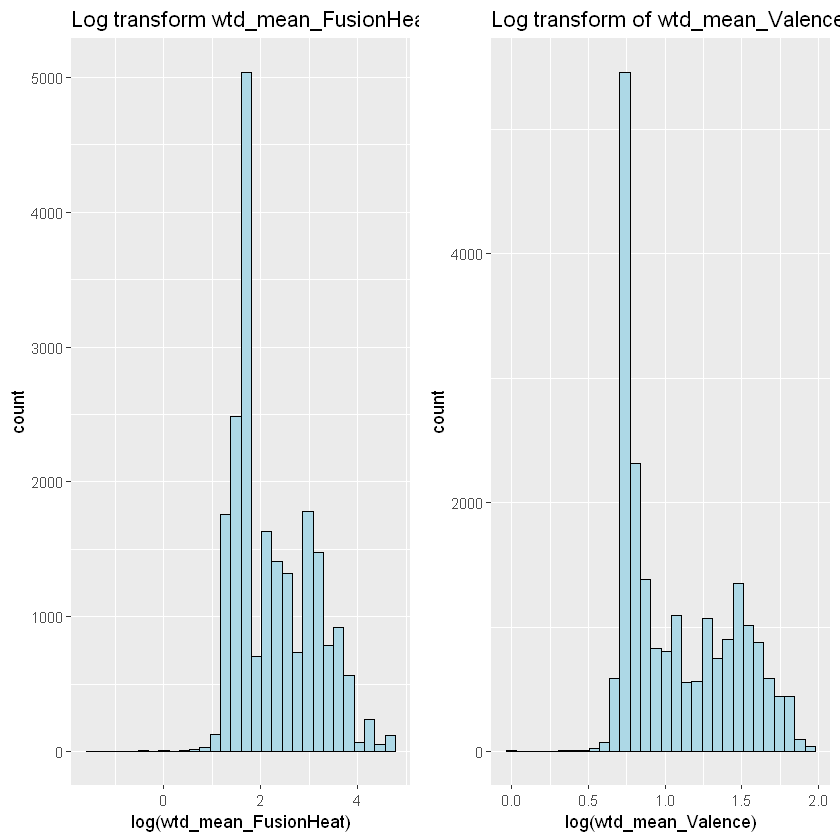

In [11]:
p6<-ggplot(aes(x=log(wtd_mean_FusionHeat)), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "lightblue") + 
    ggtitle('Log transform wtd_mean_FusionHeat')
p8<-ggplot(aes(x=log(wtd_mean_Valence)), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "lightblue") + 
    ggtitle('Log transform of wtd_mean_Valence')

grid.arrange(p6, p8, ncol = 2)

We can see these two features log transformation shows a normal distribution now 

#### 1.2.3 Geometric Mean distribution of features

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


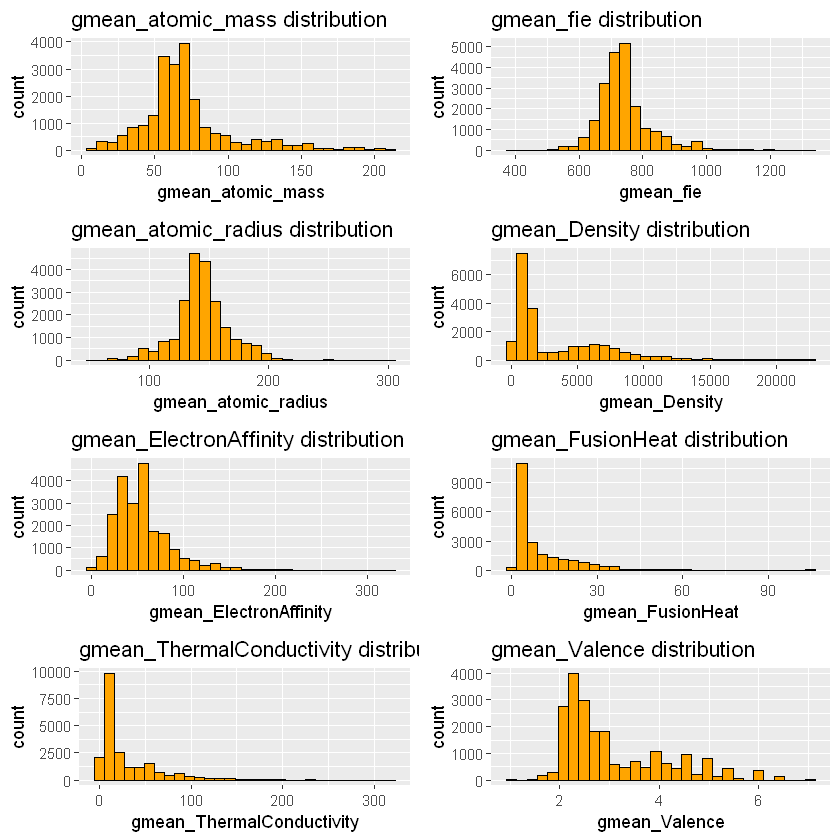

In [12]:
p1<-ggplot(aes(x=gmean_atomic_mass), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "orange") + 
    ggtitle('gmean_atomic_mass distribution')
p2<-ggplot(aes(x=gmean_fie), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "orange") + 
    ggtitle('gmean_fie distribution')
p3<-ggplot(aes(x=gmean_atomic_radius), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "orange") + 
    ggtitle('gmean_atomic_radius distribution')
p4<-ggplot(aes(x=gmean_Density), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "orange") + 
    ggtitle('gmean_Density distribution')
p5<-ggplot(aes(x=gmean_ElectronAffinity), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "orange") + 
    ggtitle('gmean_ElectronAffinity distribution')
p6<-ggplot(aes(x=gmean_FusionHeat), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "orange") + 
    ggtitle('gmean_FusionHeat distribution')
p7<-ggplot(aes(x=gmean_ThermalConductivity), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "orange") + 
    ggtitle('gmean_ThermalConductivity distribution')
p8<-ggplot(aes(x=gmean_Valence), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "orange") + 
    ggtitle('gmean_Valence distribution')

grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, ncol = 2)

Very similar distribution observed with that of mean displayed previously

#### 1.2.4 Weigthed Geometric Mean distribution

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


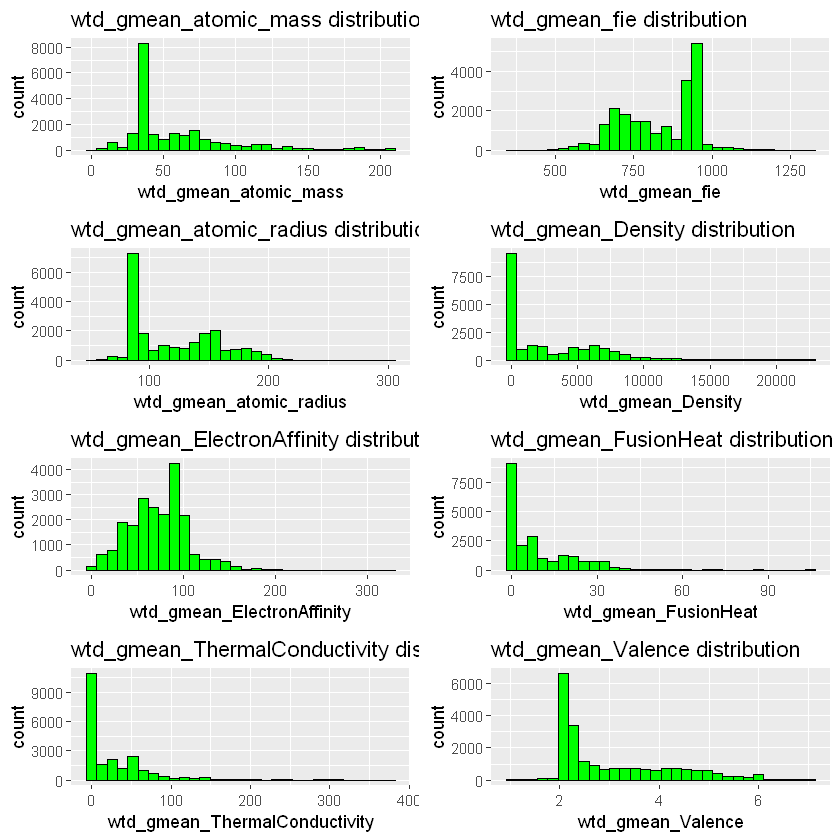

In [13]:
p1<-ggplot(aes(x=wtd_gmean_atomic_mass), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "green") + 
    ggtitle('wtd_gmean_atomic_mass distribution')
p2<-ggplot(aes(x=wtd_gmean_fie), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "green") + 
    ggtitle('wtd_gmean_fie distribution')
p3<-ggplot(aes(x=wtd_gmean_atomic_radius), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "green") + 
    ggtitle('wtd_gmean_atomic_radius distribution')
p4<-ggplot(aes(x=wtd_gmean_Density), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "green") + 
    ggtitle('wtd_gmean_Density distribution')
p5<-ggplot(aes(x=wtd_gmean_ElectronAffinity), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "green") + 
    ggtitle('wtd_gmean_ElectronAffinity distribution')
p6<-ggplot(aes(x=wtd_gmean_FusionHeat), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "green") + 
    ggtitle('wtd_gmean_FusionHeat distribution')
p7<-ggplot(aes(x=wtd_gmean_ThermalConductivity), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "green") + 
    ggtitle('wtd_gmean_ThermalConductivity distribution')
p8<-ggplot(aes(x=wtd_gmean_Valence), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "green") + 
    ggtitle('wtd_gmean_Valence distribution')

grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, ncol = 2)

again we can see positive skeweness of a lot of the distributions here

#### 1.2.5 Entropy distribution

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


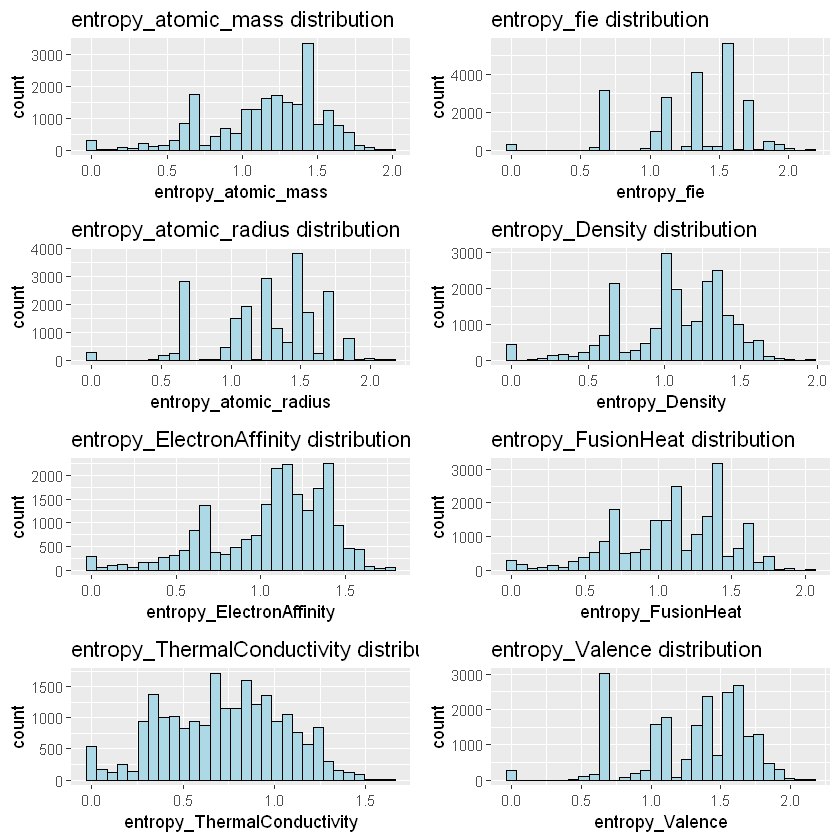

In [14]:
p1<-ggplot(aes(x=entropy_atomic_mass), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "lightblue") + 
    ggtitle('entropy_atomic_mass distribution')
p2<-ggplot(aes(x=entropy_fie), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "lightblue") + 
    ggtitle('entropy_fie distribution')
p3<-ggplot(aes(x=entropy_atomic_radius), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "lightblue") + 
    ggtitle('entropy_atomic_radius distribution')
p4<-ggplot(aes(x=entropy_Density), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "lightblue") + 
    ggtitle('entropy_Density distribution')
p5<-ggplot(aes(x=entropy_ElectronAffinity), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "lightblue") + 
    ggtitle('entropy_ElectronAffinity distribution')
p6<-ggplot(aes(x=entropy_FusionHeat), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "lightblue") + 
    ggtitle('entropy_FusionHeat distribution')
p7<-ggplot(aes(x=entropy_ThermalConductivity), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "lightblue") + 
    ggtitle('entropy_ThermalConductivity distribution')
p8<-ggplot(aes(x=entropy_Valence), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "lightblue") + 
    ggtitle('entropy_Valence distribution')

grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, ncol = 2)

The range of the entropy as expected are around 0 to 2 with left skewness displayed across the board for various properties

#### 1.2.6 Weigthed Entropy distribution

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


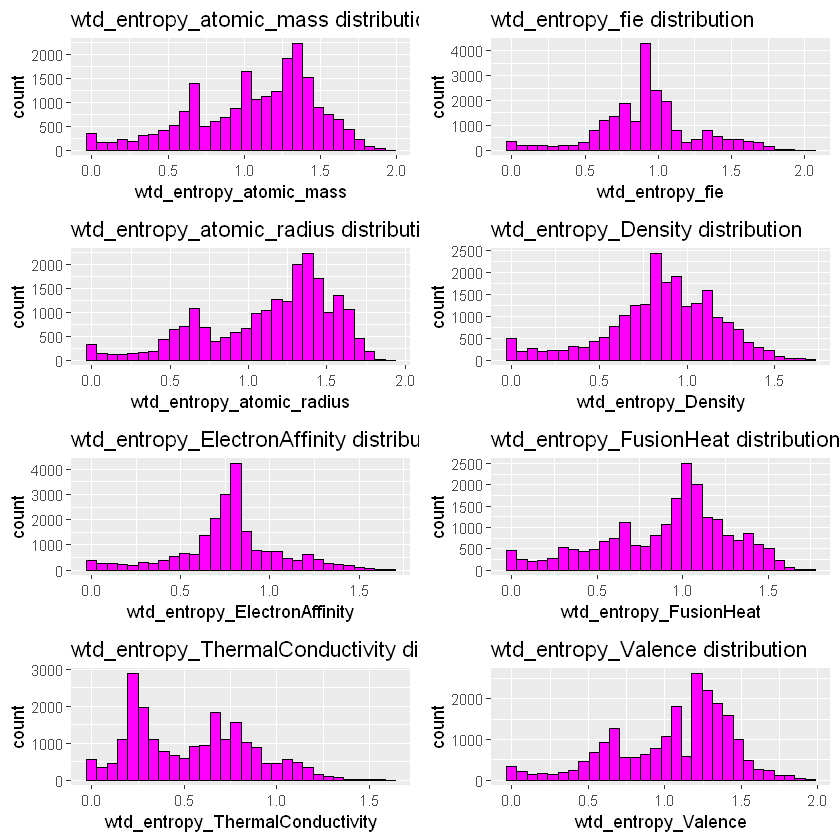

In [15]:
p1<-ggplot(aes(x=wtd_entropy_atomic_mass), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "magenta") + 
    ggtitle('wtd_entropy_atomic_mass distribution')
p2<-ggplot(aes(x=wtd_entropy_fie), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "magenta") + 
    ggtitle('wtd_entropy_fie distribution')
p3<-ggplot(aes(x=wtd_entropy_atomic_radius), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "magenta") + 
    ggtitle('wtd_entropy_atomic_radius distribution')
p4<-ggplot(aes(x=wtd_entropy_Density), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "magenta") + 
    ggtitle('wtd_entropy_Density distribution')
p5<-ggplot(aes(x=wtd_entropy_ElectronAffinity), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "magenta") + 
    ggtitle('wtd_entropy_ElectronAffinity distribution')
p6<-ggplot(aes(x=wtd_entropy_FusionHeat), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "magenta") + 
    ggtitle('wtd_entropy_FusionHeat distribution')
p7<-ggplot(aes(x=wtd_entropy_ThermalConductivity), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "magenta") + 
    ggtitle('wtd_entropy_ThermalConductivity distribution')
p8<-ggplot(aes(x=wtd_entropy_Valence), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "magenta") + 
    ggtitle('wtd_entropy_Valence distribution')

grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, ncol = 2)

Very similar properties to entropy displayed here in the distributions

#### 1.2.7 Range distribution

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


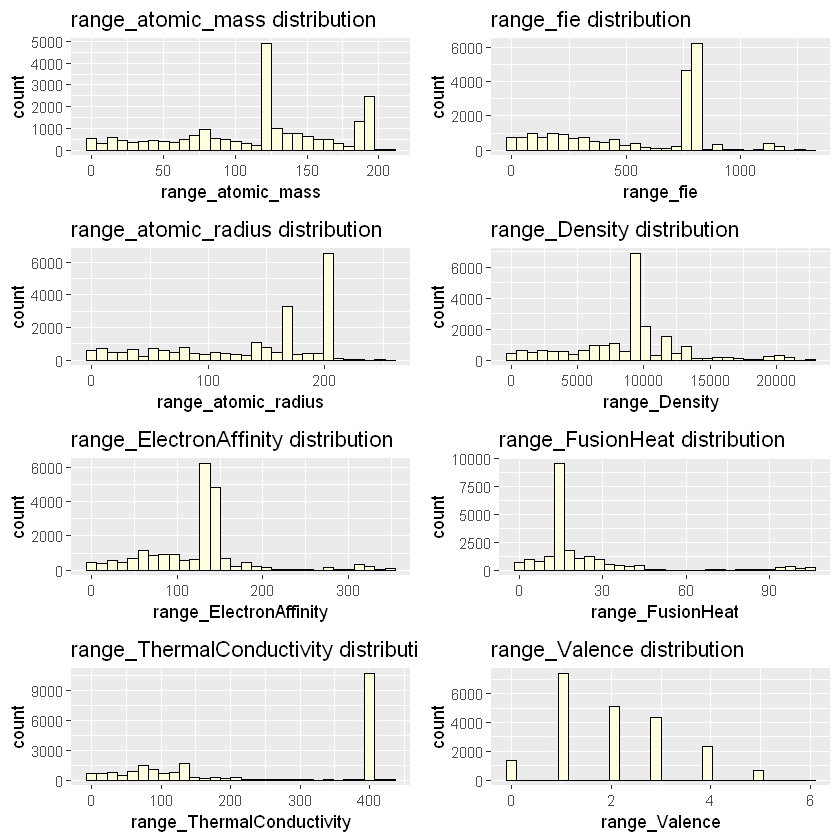

In [16]:
p1<-ggplot(aes(x=range_atomic_mass), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "lightyellow") + 
    ggtitle('range_atomic_mass distribution')
p2<-ggplot(aes(x=range_fie), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "lightyellow") + 
    ggtitle('range_fie distribution')
p3<-ggplot(aes(x=range_atomic_radius), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "lightyellow") + 
    ggtitle('range_atomic_radius distribution')
p4<-ggplot(aes(x=range_Density), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "lightyellow") + 
    ggtitle('range_Density distribution')
p5<-ggplot(aes(x=range_ElectronAffinity), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "lightyellow") + 
    ggtitle('range_ElectronAffinity distribution')
p6<-ggplot(aes(x=range_FusionHeat), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "lightyellow") + 
    ggtitle('range_FusionHeat distribution')
p7<-ggplot(aes(x=range_ThermalConductivity), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "lightyellow") + 
    ggtitle('range_ThermalConductivity distribution')
p8<-ggplot(aes(x=range_Valence), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "lightyellow") + 
    ggtitle('range_Valence distribution')

grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, ncol = 2)

highest range displayed by Density and lowest range by valence which seems to be categorical

#### 1.2.8 Weighted Range distribution

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


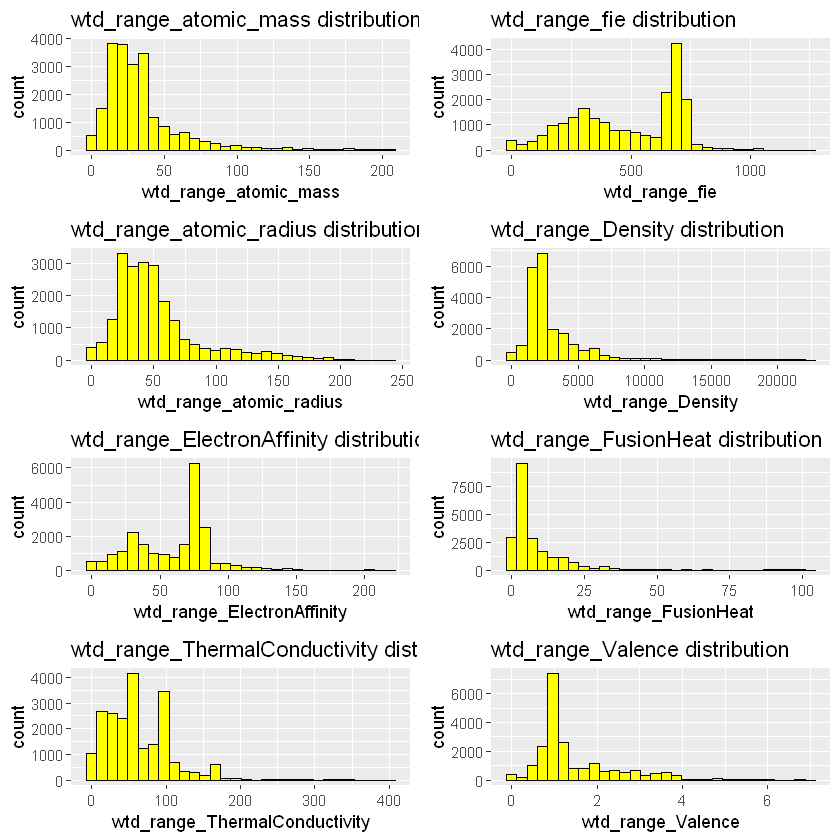

In [17]:
p1<-ggplot(aes(x=wtd_range_atomic_mass), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "yellow") + 
    ggtitle('wtd_range_atomic_mass distribution')
p2<-ggplot(aes(x=wtd_range_fie), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "yellow") + 
    ggtitle('wtd_range_fie distribution')
p3<-ggplot(aes(x=wtd_range_atomic_radius), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "yellow") + 
    ggtitle('wtd_range_atomic_radius distribution')
p4<-ggplot(aes(x=wtd_range_Density), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "yellow") + 
    ggtitle('wtd_range_Density distribution')
p5<-ggplot(aes(x=wtd_range_ElectronAffinity), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "yellow") + 
    ggtitle('wtd_range_ElectronAffinity distribution')
p6<-ggplot(aes(x=wtd_range_FusionHeat), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "yellow") + 
    ggtitle('wtd_range_FusionHeat distribution')
p7<-ggplot(aes(x=wtd_range_ThermalConductivity), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "yellow") + 
    ggtitle('wtd_range_ThermalConductivity distribution')
p8<-ggplot(aes(x=wtd_range_Valence), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "yellow") + 
    ggtitle('wtd_range_Valence distribution')

grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, ncol = 2)

Right skewed for most features smaller varience displayed than range of features

#### 1.2.9 standard deviation distribution

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


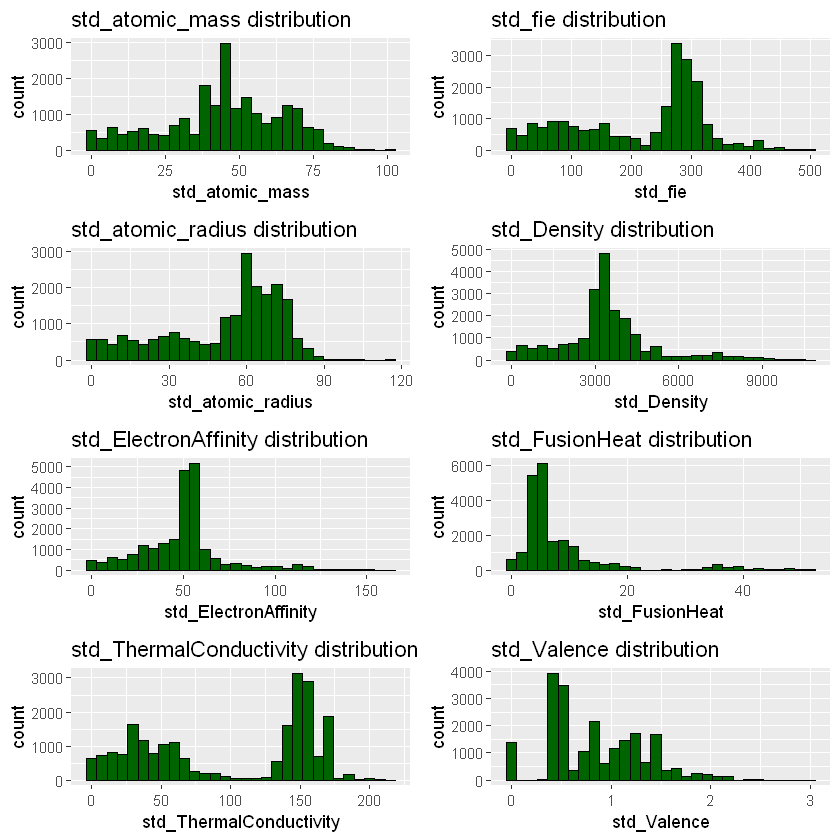

In [18]:
p1<-ggplot(aes(x=std_atomic_mass), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "darkgreen") + 
    ggtitle('std_atomic_mass distribution')
p2<-ggplot(aes(x=std_fie), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "darkgreen") + 
    ggtitle('std_fie distribution')
p3<-ggplot(aes(x=std_atomic_radius), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "darkgreen") + 
    ggtitle('std_atomic_radius distribution')
p4<-ggplot(aes(x=std_Density), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "darkgreen") + 
    ggtitle('std_Density distribution')
p5<-ggplot(aes(x=std_ElectronAffinity), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "darkgreen") + 
    ggtitle('std_ElectronAffinity distribution')
p6<-ggplot(aes(x=std_FusionHeat), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "darkgreen") + 
    ggtitle('std_FusionHeat distribution')
p7<-ggplot(aes(x=std_ThermalConductivity), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "darkgreen") + 
    ggtitle('std_ThermalConductivity distribution')
p8<-ggplot(aes(x=std_Valence), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "darkgreen") + 
    ggtitle('std_Valence distribution')

grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, ncol = 2)

We can see the std_ThermalConductivity feature seemd to show a bimodal distribution below I look at the relationship between the target variable and this feature and can see same behaviour displayed

also the standard deviation of Valence is the lowest and Density being the highest

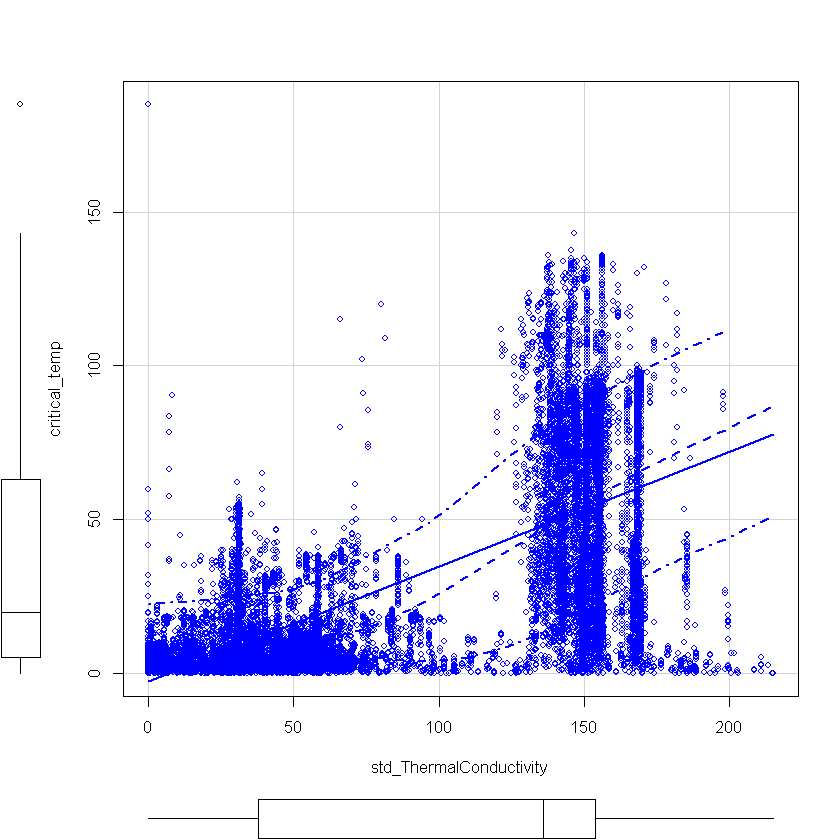

In [19]:
scatterplot(critical_temp~std_ThermalConductivity, data = smd_data)

#### 1.2.10 Weighted Standard deviation distribution

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


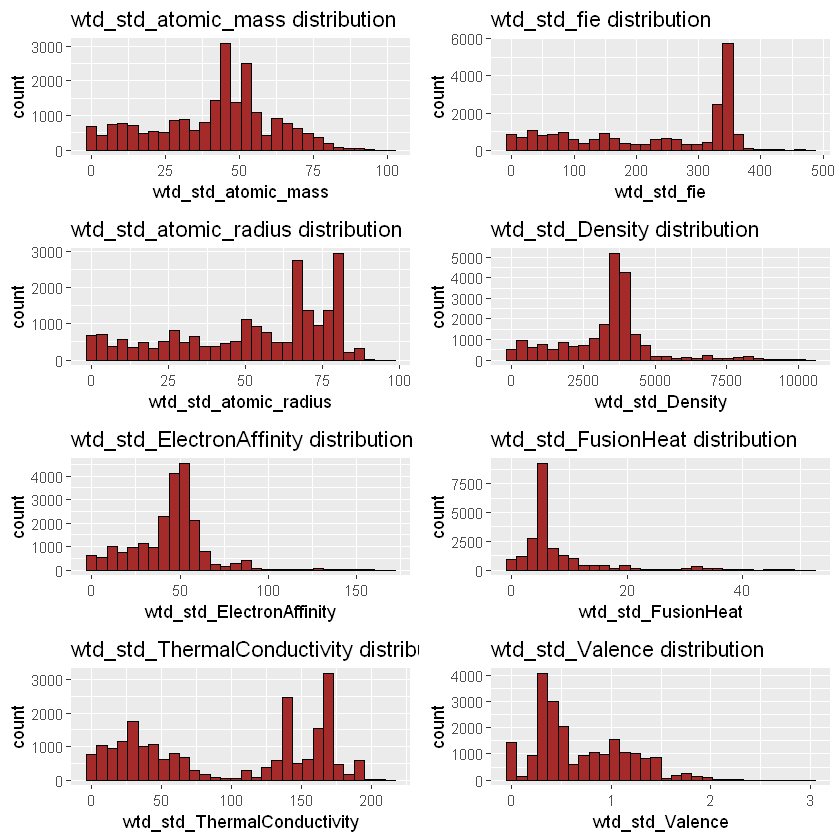

In [20]:
p1<-ggplot(aes(x=wtd_std_atomic_mass), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "brown") + 
    ggtitle('wtd_std_atomic_mass distribution')
p2<-ggplot(aes(x=wtd_std_fie), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "brown") + 
    ggtitle('wtd_std_fie distribution')
p3<-ggplot(aes(x=wtd_std_atomic_radius), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "brown") + 
    ggtitle('wtd_std_atomic_radius distribution')
p4<-ggplot(aes(x=wtd_std_Density), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "brown") + 
    ggtitle('wtd_std_Density distribution')
p5<-ggplot(aes(x=wtd_std_ElectronAffinity), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "brown") + 
    ggtitle('wtd_std_ElectronAffinity distribution')
p6<-ggplot(aes(x=wtd_std_FusionHeat), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "brown") + 
    ggtitle('wtd_std_FusionHeat distribution')
p7<-ggplot(aes(x=wtd_std_ThermalConductivity), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "brown") + 
    ggtitle('wtd_std_ThermalConductivity distribution')
p8<-ggplot(aes(x=wtd_std_Valence), data =  smd_data) +
    geom_histogram(color = I('black'), fill = "brown") + 
    ggtitle('wtd_std_Valence distribution')

grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, ncol = 2)

### 1.3 Correlation between features

What we can observe is also that there seems to be a lot of similarity between the distribution of some of the features here for example in the above two groups of histograms there is a lot of similarity in between wtd_std and std of the 8 features. we will explore these further below. also that some of the features are not normally distributed and are skewed in their distribution. this means that their can be some issues with normality when linear regression is used

Now in order to visualise this and be able to read a little more into the correlation I use some visualisation, however first I am interested in seeing the correlation between each 10 predictors which are generated from each main feature. it would be interesting to see how/if they have strong correlation amongst themselves...

In [21]:
# DIY correlation plot
# http://stackoverflow.com/questions/31709982/how-to-plot-in-r-a-correlogram-on-top-of-a-correlation-matrix
# there's some truth to the quote that modern programming is often stitching together pieces from SO 

colorRange <- c('#69091e', '#e37f65', 'white', '#aed2e6', '#042f60')
## colorRamp() returns a function which takes as an argument a number
## on [0,1] and returns a color in the gradient in colorRange
myColorRampFunc <- colorRamp(colorRange)

panel.cor <- function(w, z, ...) {
    correlation <- cor(w, z)

    ## because the func needs [0,1] and cor gives [-1,1], we need to shift and scale it
    col <- rgb(myColorRampFunc((1 + correlation) / 2 ) / 255 )

    ## square it to avoid visual bias due to "area vs diameter"
    radius <- sqrt(abs(correlation))
    radians <- seq(0, 2*pi, len = 50) # 50 is arbitrary
    x <- radius * cos(radians)
    y <- radius * sin(radians)
    ## make them full loops
    x <- c(x, tail(x,n=1))
    y <- c(y, tail(y,n=1))

    ## trick: "don't create a new plot" thing by following the
    ## advice here: http://www.r-bloggers.com/multiple-y-axis-in-a-r-plot/
    ## This allows
    par(new=TRUE)
    plot(0, type='n', xlim=c(-1,1), ylim=c(-1,1), axes=FALSE, asp=1)
    polygon(x, y, border=col, col=col)
}

# usage e.g.:
# pairs(mtcars, upper.panel = panel.cor)

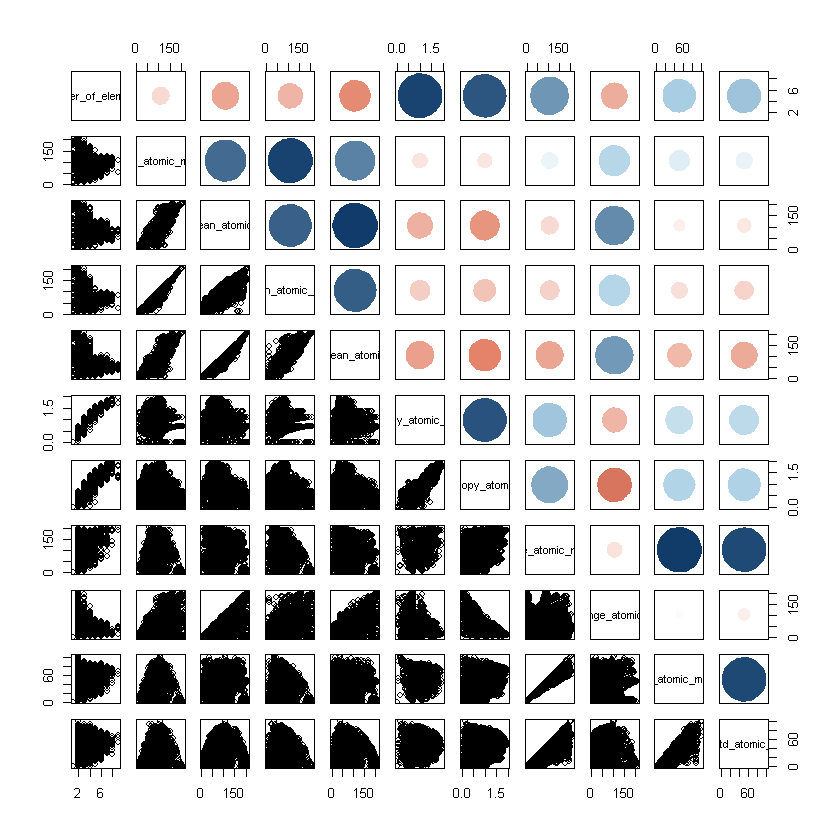

In [22]:
pairs(smd_data[1:11], upper.panel=panel.cor)

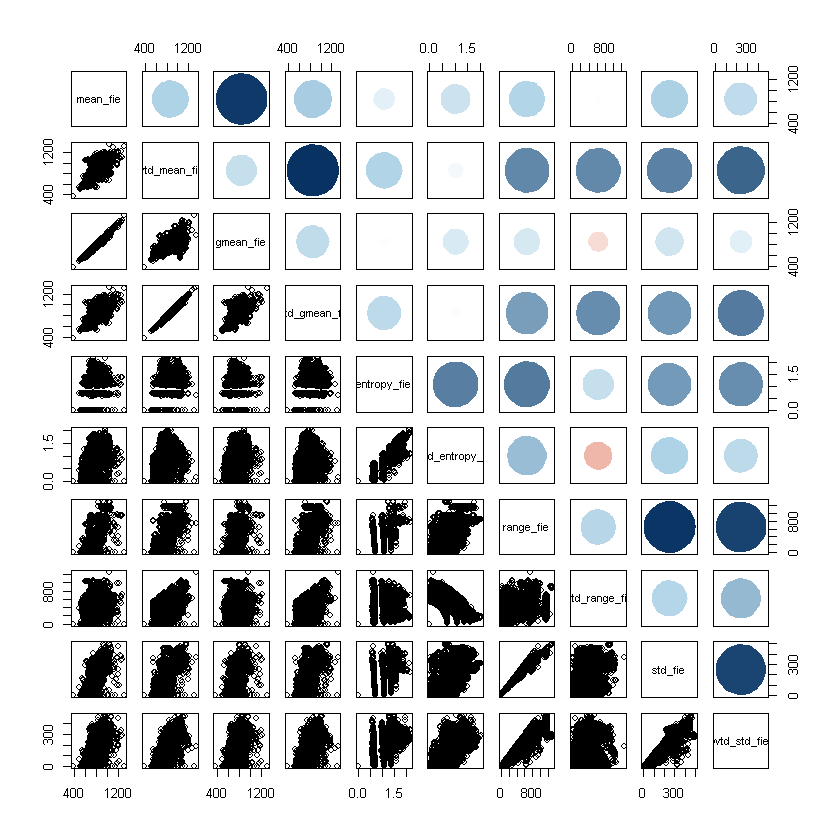

In [23]:
pairs(smd_data[12:21], upper.panel=panel.cor)

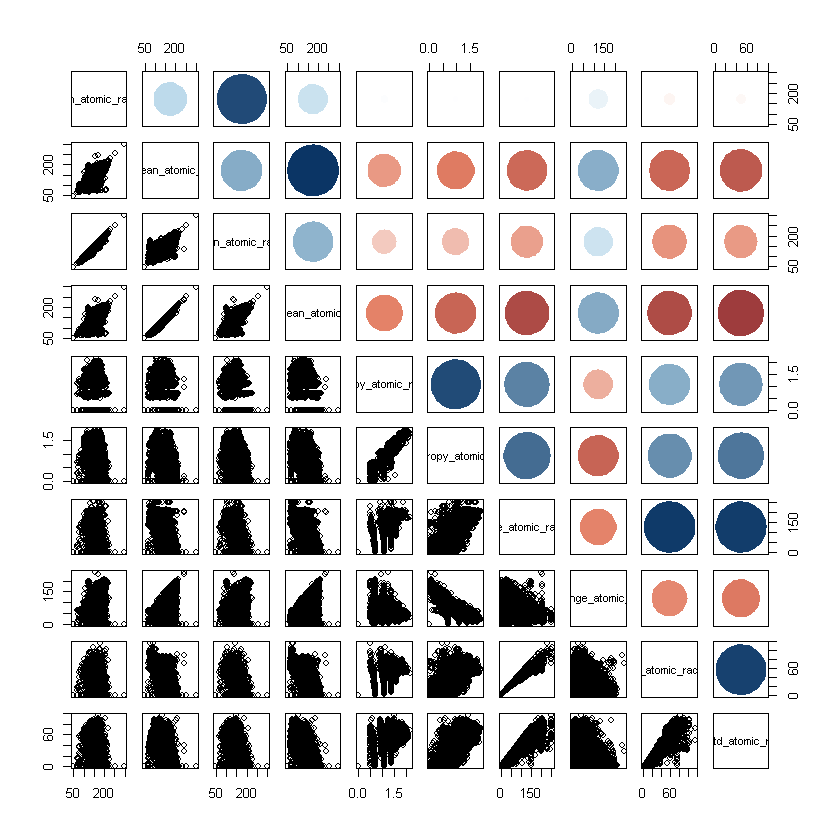

In [24]:
pairs(smd_data[22:31], upper.panel=panel.cor)

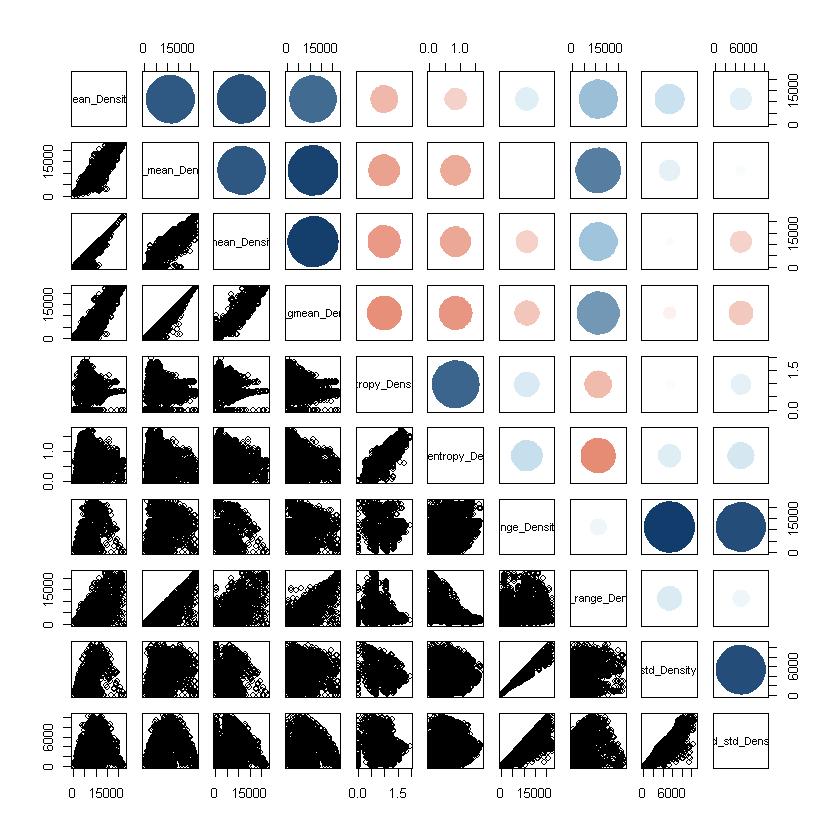

In [25]:
pairs(smd_data[32:41], upper.panel=panel.cor)

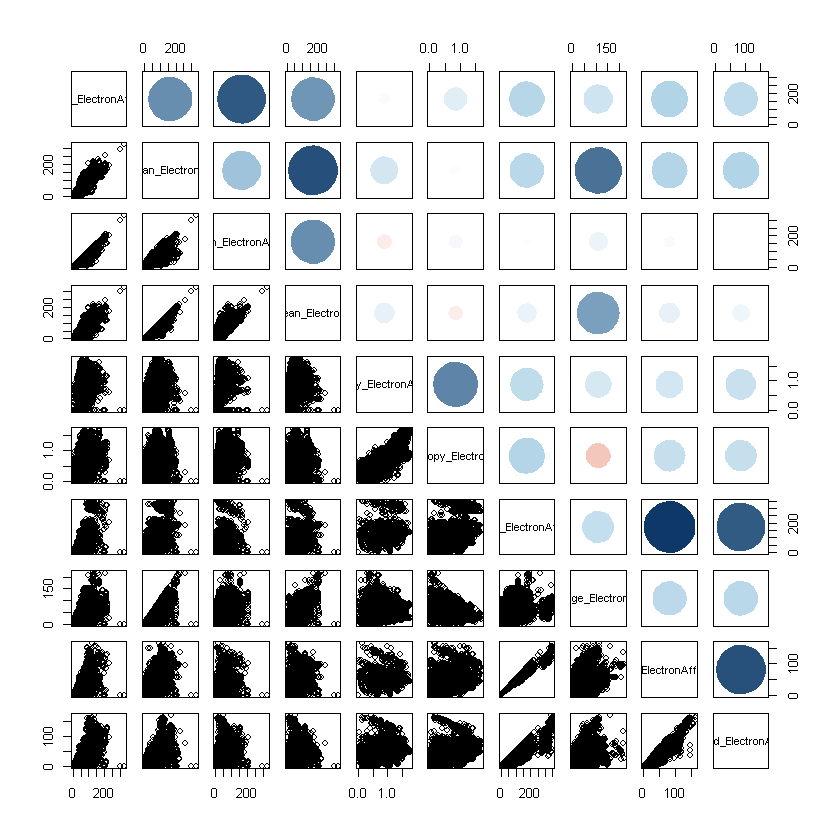

In [26]:
pairs(smd_data[42:51], upper.panel=panel.cor)

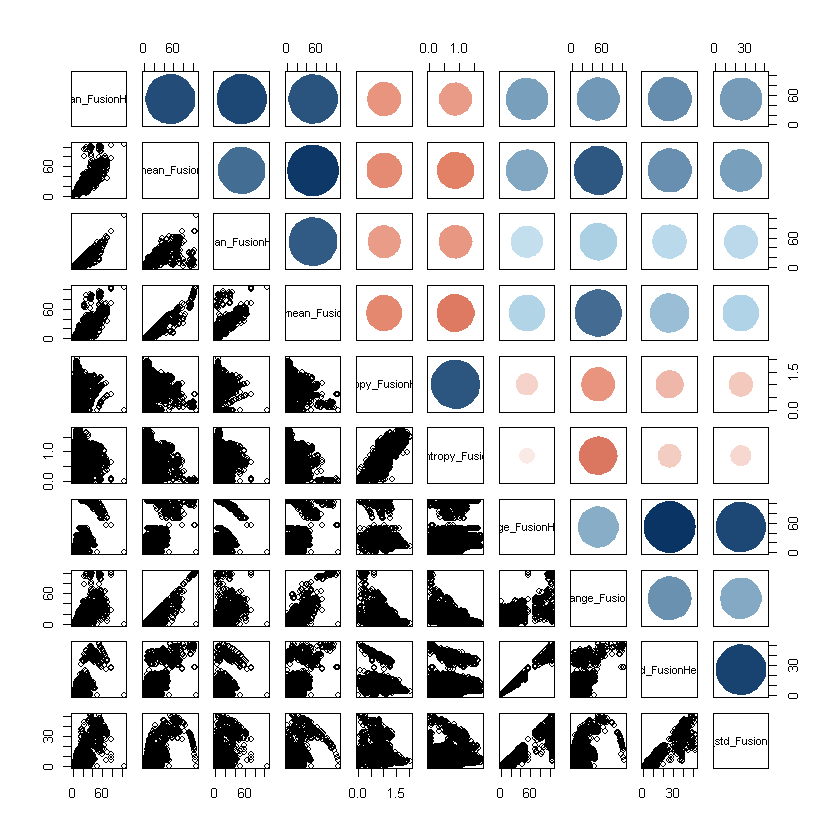

In [27]:
pairs(smd_data[52:61], upper.panel=panel.cor)

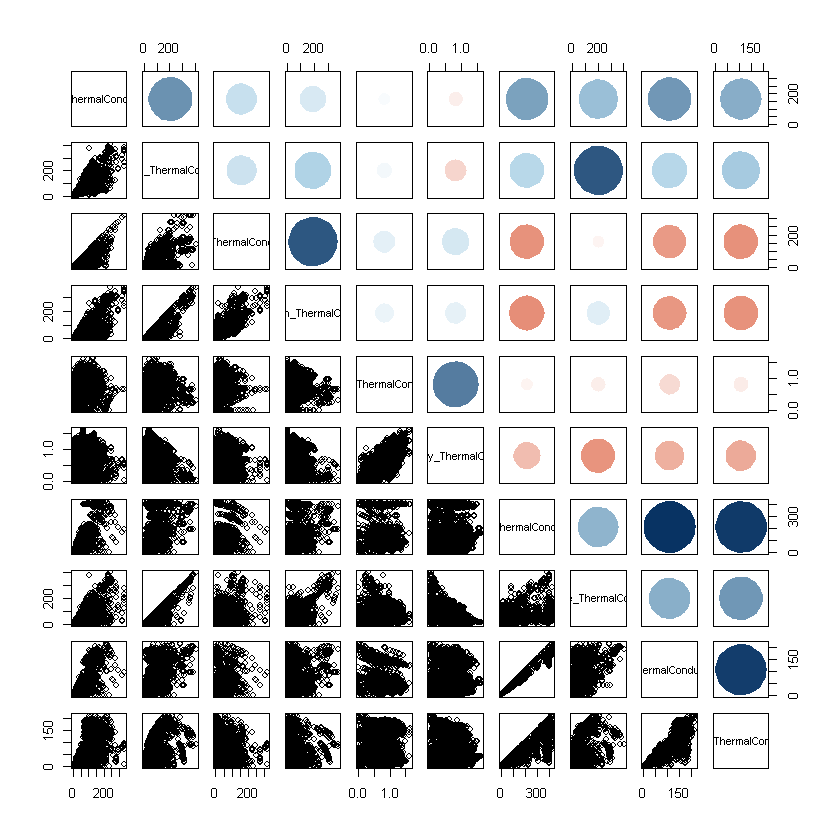

In [28]:
pairs(smd_data[62:71], upper.panel=panel.cor)

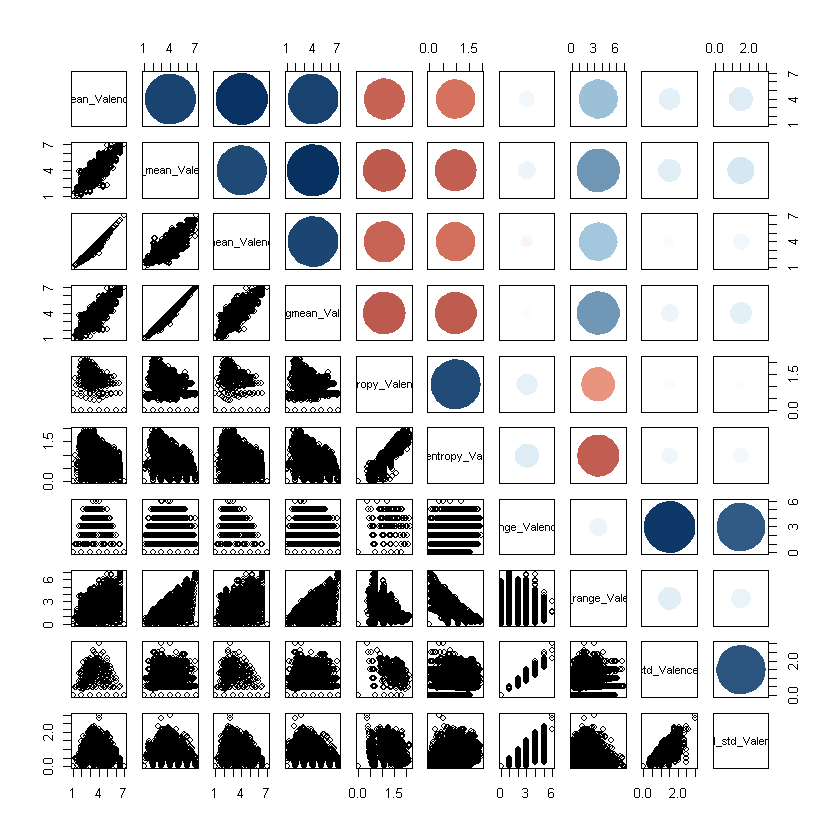

In [29]:
pairs(smd_data[72:81], upper.panel=panel.cor)

from above we can see the heavy correlations between the features now just to have a view of all the dataset correlations which makes things more visually visible

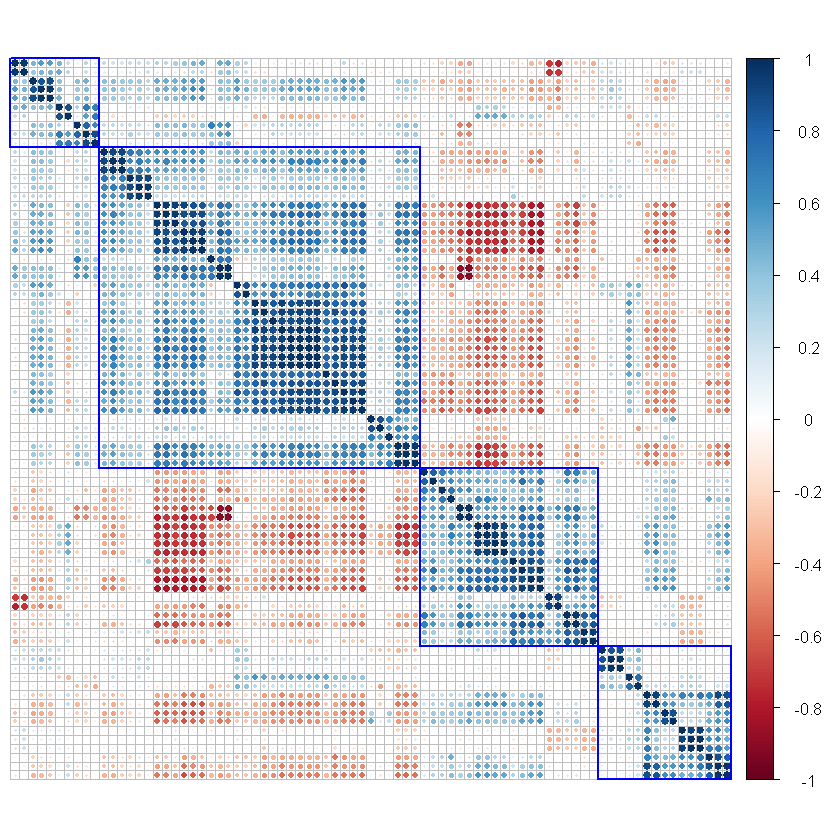

In [30]:
M<- cor(smd_data[1:81])
corrplot(M, order = "hclust", addrect = 4, rect.col = "blue",tl.pos='n')

I will now attempt to gain an idea of which features are heavily correlated, I take two approach to do this. one is using a library Hmisc and a function called flattenCorrMatrix

referenced by http://www.sthda.com/english/wiki/print.php?id=78

the other approach is suggested in below reference, and used the library mlbench and caret

https://machinelearningmastery.com/feature-selection-with-the-caret-r-package/

I will explore both approaches below

In [31]:
# ++++++++++++++++++++++++++++
# flattenCorrMatrix
# ++++++++++++++++++++++++++++
# cormat : matrix of the correlation coefficients
# pmat : matrix of the correlation p-values
flattenCorrMatrix <- function(cormat) {
  ut <- upper.tri(cormat)
  data.frame(
    row = rownames(cormat)[row(cormat)[ut]],
    column = rownames(cormat)[col(cormat)[ut]],
    cor  =(cormat)[ut]
    )
}

In [32]:
#install.packages("Hmisc")
library(Hmisc)

Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: 'Hmisc'

The following object is masked from 'package:psych':

    describe

The following objects are masked from 'package:base':

    format.pval, units



In [33]:
res2<-rcorr(as.matrix(smd_data[,1:81]))
cor_table = flattenCorrMatrix(res2$r)

In [34]:
high_cor = cor_table[(cor_table$cor > 0 & cor_table$cor > 0.85) | (cor_table$cor < 0 & cor_table$cor < -0.85),]

In [35]:
high_cor[order(-high_cor$cor),]

,row,column,cor
316,entropy_fie,entropy_atomic_radius,0.9977394
2774,wtd_mean_Valence,wtd_gmean_Valence,0.9949388
2791,entropy_fie,entropy_Valence,0.9927256
104,wtd_mean_fie,wtd_gmean_fie,0.9923311
2700,mean_Valence,gmean_Valence,0.9899105
2801,entropy_atomic_radius,entropy_Valence,0.9895461
2414,range_ThermalConductivity,std_ThermalConductivity,0.9878666
1769,range_FusionHeat,std_FusionHeat,0.9845736
189,range_fie,std_fie,0.9816283
299,wtd_mean_atomic_radius,wtd_gmean_atomic_radius,0.9801072


below method is taken from 
https://machinelearningmastery.com/feature-selection-with-the-caret-r-package/

In [36]:
#install.packages('mlbench')
library(mlbench)
library(caret)


Attaching package: 'caret'

The following object is masked from 'package:survival':

    cluster



In [37]:
correlationMatrix <- cor(smd_data[,1:81])
# summarize the correlation matrix
#print(correlationMatrix)
# find attributes that are highly corrected (ideally >0.85)
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.85)
# print indexes of highly correlated attributes
highlyCorrelated

[1] 18 21 27 28 31 76 77 16 20  7 35  1 26 34 68 75 73  6 71 57 25 72 56 13 33
[26]  8 23  5 17 55 54 11 64 48 51 53  4 24 38 43 40 14 42 61 58 63 81 80

## 2. Dimension reduction - Feature selection


From the above analysis we can see that there seems to be a lot of features which have high correlation with each other this could be a disadvantage for the modelling task since this could cause redundant use of features and also not an optimal model that would perform poorly. the other disadvantage of having a lot of features could be overfitting and would result in a lot of variance in our model which would mean the model would not perform well when presented with new data.

we need to identify a method so that we can choose only a subset of features that may result in an improved model. in general and broadly speaking there are Univariate Feature Selection methods and multivariate methods. the Univariate methods generally require manual work such as the work we have done above to obtain statistical understanding of each feature and rely on domain expertise to select only the features that will benefit our agenda which for example here is to predict the critical temperature of the super conductor. however in the absence of domain expertise which is the case for me I need to mostly rely on Multivariate methods which will perform better on so many features and with no domain knowledge present.

after studying for a while multivariate methods themselves seem to be fitted in to categorise and various ways one can achieve reducing the dimensions of the dataset. these methods are mainly classified under Wrapper methods vs Filter methods and some embedded methods. some of the references that I have studied to understand these are mentioned here and some of the methods presented are taken from these sources

* https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/

* https://towardsdatascience.com/getting-data-ready-for-modelling-feature-engineering-feature-selection-dimension-reduction-39dfa267b95a

basically the wrapper methods rely on building models and using them to select the number of features that play an important role in the accuracy of the model these can include forward, backward, Lasso, Ridge (which have been also explored and mentioned in the ISLR book). These techniques are mostly geared towards a particular model for example Linear regression and are mostly resource intensive as the model needs to be trained multiple times and adjusted, hence why it may not be a good idea to start off on a large number of features using these methods.

Filtering methods on the other hand are relying on the dataset and the features themselves without relying on a specific modelling technique and usually perform filtering based on statistics we explored in previous section such as looking at the variance of the features, correlation between them or Mutual entropy and reduce the features to those which they believe can give you the most information without having any redundancy, example of these are Pearson's Correlation, LDA, Anova.

For this study I have decided to use both these techniques, firstly I will reduce my features based on a filtering method, and then I will use wrapper methods to understand which features are best to keep for my models

### 2.1 Filter Method - Minimum Redundancy Maximum Relevance (MRMR)

Below I have used this technique as the chosen technique to filter my features and extract the top features which can be most relevant in my dataset serving minimum redundancy and maximum relevance.

The MRMR algorithm used here uses mutual information (entropy) index between two features to select the best features, it can be custom set to select the desired number of features.

Mutual information measures the amount of information that exists between two variables, if the variables are totally independent then the mutual information between them is practically 0 (https://en.wikipedia.org/wiki/Mutual_information)

in our case we need features which are statistically speaking independent of each other

based on what I have seen in previous section and the EDA performed my aim is to keep the top 40 features and filter them using this technique at this stage. I have used top 40 because I could see almost around 50 features heavily correlated and I am taking a safe approach to select only the top 40 which are mutually less redundant

the details of the package is referenced here

* https://rdrr.io/cran/mRMRe/f/inst/doc/mRMRe.pdf

In [38]:
#install.packages("mRMRe")
library(mRMRe)

Loading required package: igraph

Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [39]:
# the package need only numeric fields, converting the integers to numeric
smd_data[[1]] <- as.numeric(smd_data[[1]])
smd_data[[28]] <- as.numeric(smd_data[[28]])
smd_data[[78]] <- as.numeric(smd_data[[78]])

In [40]:
dd <- mRMR.data(data=(smd_data))

Below I use the mim() method provided in the package to display partially the matrix of mutual information between the first 10 features in my dataset, just to see how the values are looking

In [41]:
# show partial mutual information matrix
print(mim(subsetData(dd, 1:10, 1:10)))

                        number_of_elements mean_atomic_mass
number_of_elements                     Inf     8.407376e-02
mean_atomic_mass               0.084073757              Inf
wtd_mean_atomic_mass           0.171083282     1.044275e+00
gmean_atomic_mass              0.280667235     1.186070e+00
wtd_gmean_atomic_mass          0.227730266     9.703818e-01
entropy_atomic_mass            2.434889487     5.098372e-02
wtd_entropy_atomic_mass        0.001044906     1.431694e-01
range_atomic_mass              0.000000000     8.959500e-14
wtd_range_atomic_mass          0.033482738     5.380217e-02
std_atomic_mass                0.020030053     5.660021e-01
                        wtd_mean_atomic_mass gmean_atomic_mass
number_of_elements              1.710833e-01        0.28066724
mean_atomic_mass                1.044275e+00        1.18606980
wtd_mean_atomic_mass                     Inf        1.14290793
gmean_atomic_mass               1.142908e+00               Inf
wtd_gmean_atomic_mass    

We can see for example feature (range_atomic_mass) has 0 mutual information with (wtd_gmean_atomic_mass) perhaps indicating they are mutually independent

I will now use the mRMR.classic() method in this package to select the top 40 features

In [42]:
# setting the taret indices to 82 and the selected features to 40 as per documentation of mrmr
mrmr = mRMR.classic("mRMRe.Filter", data = dd, target_indices = 82 , feature_count = 40)

the @filters attribute provides the final features for me

In [43]:
# creating a vector of feature indexes
vect <- unlist(mrmr@filters, use.names = FALSE)
vect

[1] 67 77 10 75 14 54  3 17 29 80 31 59 45 40  1 34 70 51 19 64 57 61 72 62 18
[26] 69 79 56 22 68  9 52  8 73 63 28 81  7 44 71

In [44]:
# creating a dataframe of filtered features and output variable
filt_data <- smd_data[, c(vect,82)]

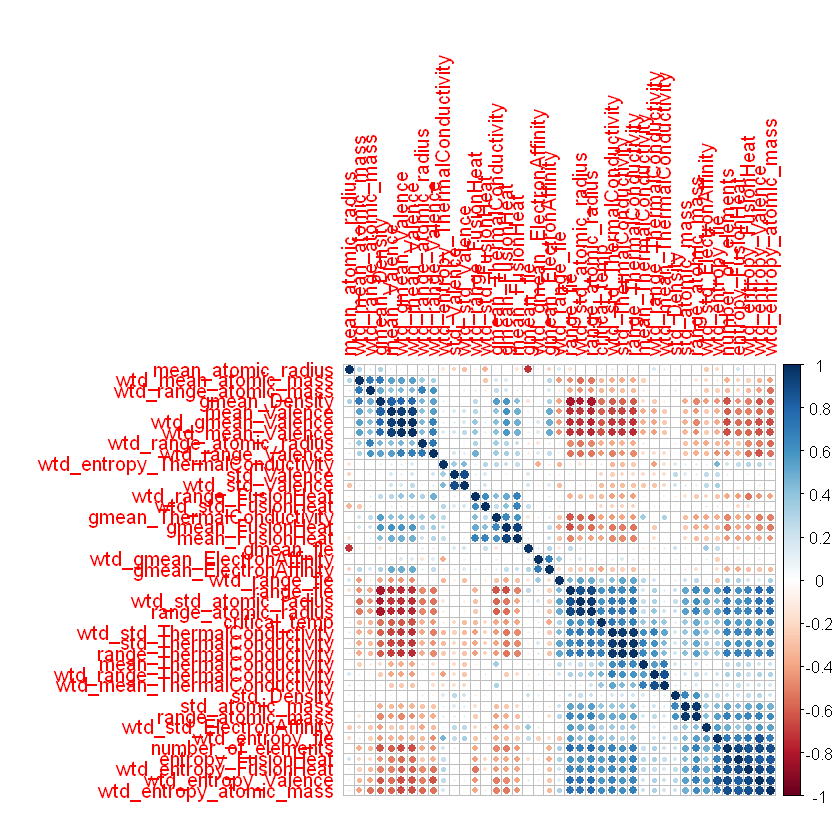

In [45]:
Mcor <- cor(filt_data)
corrplot(Mcor, method = "circle", order = "hclust")

visualising the correlation matrix for my new filtered dataset, allows me to see that there is still some heavy correlated features which suggests that perhaps if I had chosen features based on mutual correlation rather than applying the MRMR method I would have ended up with a somewhat different set of features and not necessarily the current selected features

However since there is a lot of similarity in the features in this dataset this can still possibly lead to the desired outcome and I will continue to the next section where I try to reduce the dimension of my dataset applying some wrapper methods which are model dependant and could result in a much smaller set of features

### 2.2 Wrapper Methods

Now that I have a smaller dataset with 40 features, I can look to implement further feature reduction using wrapper methods, these methods generally rely on a modelling technique and would mainly depend on what modelling technique you are going to use.

in my case I want to compare 3 final models together, a linear regression model, GAM model and a Random Forest model to see how they will perform on my dataset

for this reason, I will choose Wrapper methods which can provide me with the final features that are best to be used for these two modelling techniques

in this case Lasso for linear regression and importance method for Random Forest feature selection.

I will discuss these further in next coming sections


### 2.2.1 Lasso - linear regression

Now from Chapter 6 of the text book ISLR (section 6.2 Shrinkage Methods) we learn that two of the best known techniques for shrinkage of the regression coefficients towards zero are ridge regression and the lasso.

below is from this chapter of the book and I include this here for explaining the approach I have taken next.

both techniques have a very similar approach and the main advantage over least squares is rooted in the bias-variance
trade-off. As λ (which is the term that is used as tuning parameter) increases, the flexibility of the ridge regression fit decreases, leading to decreased variance but increased bias.

the main difference between them however is that that ridge doesn't really set any of the coefficients as exactly zero, hence it will generally lead to models include all predictors rather than just a subset of the variables, The penalty will shrink all of the coefficients towards zero, but it will not set any of them exactly to zero (unless λ = ∞). This may not be a problem for prediction accuracy, but it can create a challenge in model interpretation in settings in which the number of variables p is quite large like our dataset. Lasso As with ridge regression shrinks the coefficient estimates towards zero. However, in the case of the lasso, the penalty has the effect of forcing some of the coefficient estimates to be exactly equal to zero when
the tuning parameter λ is sufficiently large. Hence, much like best subset selection, the lasso performs variable selection. As a result, models generated from the lasso are generally much easier to interpret than those produced by ridge regression.

I aim to explore applying lasso on my reduced dataset to obtain a list of reduced features for my linear regression model, the main reason is I want to avoid using backward or forward selection methods which are more resource intensive and require multiple training of the model to decide on the features

some of the references used for this are

* https://www.rstatisticsblog.com/data-science-in-action/lasso-regression/
* https://stats.stackexchange.com/questions/283952/lasso-and-dimension-reduction/284272
* ISLR Chapter 6 - 6.6.2 Ridge regression and the Lasso

In [46]:
dim(filt_data)

[1] 21263    41

I split the dataset in to a test and train set for now 25% - 75% split

In [47]:
x = model.matrix(critical_temp~., filt_data)[,-1]
y = filt_data[row.names(x),]$critical_temp

In [48]:
set.seed(123)
train = sample(1:nrow(x), nrow(x)*0.75)
test = (-train)
y.test = y[test]

In [49]:
length(train)

[1] 15947

In [50]:
length(y.test)

[1] 5316

#### Parameter tuning - model training

Now I will train a Lasso model using the glmnet() function, as per the documentation using argument alpha=1 will apply lasso regression, we need to tune the lambda parameter as well this is done by using the cv.glmnet() method, used below.

In [51]:
library('glmnet')

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [52]:
lambda_seq <- 10^seq(2, -2, by = -.1)

In [53]:
set.seed(123)
cv_output <- cv.glmnet(x[train,], y[train], alpha=1, lambda=lambda_seq)

In [54]:
#identifying best lambda
best_lam <- cv_output$lambda.min
best_lam

[1] 0.01

In [55]:
# Rebuilding the model with best lamda value identified
lasso_best <- glmnet(x[train,], y[train], alpha = 1, lambda = best_lam)

#### Model prediction and evaluation

I will now use the predict() method to apply the model for prediction using the test set and calculate the MSE

In [56]:
# Prediction on the test set
lasso_pred <- predict(lasso_best, s = best_lam, newx = x[test,])

In [57]:
MSE_lasso = mean((lasso_pred - y.test)^2)
MSE_lasso

[1] 366.5781

#### Feature Selection

Lets see which one of the features have significant coefficients and which are set to 0 or very small value in comparision

In [58]:
lasso_coef = predict(lasso_best, type="coefficient")

In [59]:
lasso_coef

41 x 1 sparse Matrix of class "dgCMatrix"
                                           s0
(Intercept)                     -24.458101569
wtd_entropy_ThermalConductivity  22.693325078
wtd_entropy_Valence              -4.770708267
std_atomic_mass                  -0.274492624
wtd_gmean_Valence                -3.295597775
gmean_fie                         0.052732766
gmean_FusionHeat                  0.035806570
wtd_mean_atomic_mass              0.115875931
wtd_entropy_fie                 -27.850521818
wtd_range_atomic_radius          -0.068142516
std_Valence                       6.010035989
wtd_std_atomic_radius            -0.030958842
wtd_range_FusionHeat              0.126258657
wtd_gmean_ElectronAffinity       -0.219929395
std_Density                      -0.001777923
number_of_elements               -1.349723059
gmean_Density                    -0.001378186
std_ThermalConductivity          -0.144146328
wtd_std_ElectronAffinity          0.094398621
wtd_range_fie                    -0.00

I can see Lasso has set coefficient for one feature (mean_FusionHeat) to 0 and there are some very smaller coefficients such as
range_fie, gmean_Density, std_Density

I will now filter out these features in my final list of features to be used for linear regression, the criteria I am using is any coefficient which is bigger than 0.1 and or smaller than -0.1

In [60]:
lasso_coef <- as.matrix(lasso_coef)
lasso_coef <- as.data.frame(lasso_coef)

In [61]:
final_coef <- subset(lasso_coef, s0 %in% lasso_coef[(lasso_coef$s0 > 0.1) | (lasso_coef$s0 < (-0.1)),])

In [62]:
coef_names_lr <- row.names(final_coef)[-1]

In [63]:
coef_names_lr
length(coef_names_lr)

[1] "wtd_entropy_ThermalConductivity" "wtd_entropy_Valence"            
 [3] "std_atomic_mass"                 "wtd_gmean_Valence"              
 [5] "wtd_mean_atomic_mass"            "wtd_entropy_fie"                
 [7] "std_Valence"                     "wtd_range_FusionHeat"           
 [9] "wtd_gmean_ElectronAffinity"      "number_of_elements"             
[11] "std_ThermalConductivity"         "gmean_ThermalConductivity"      
[13] "wtd_entropy_FusionHeat"          "wtd_std_FusionHeat"             
[15] "mean_Valence"                    "wtd_range_ThermalConductivity"  
[17] "wtd_range_Valence"               "entropy_FusionHeat"             
[19] "range_atomic_mass"               "wtd_mean_Valence"               
[21] "wtd_mean_ThermalConductivity"    "range_atomic_radius"            
[23] "wtd_std_Valence"                 "wtd_entropy_atomic_mass"        
[25] "wtd_std_ThermalConductivity"

[1] 25

These 25 features will serve the basis of my linear regression model in the modeling stage of this study.

### 2.2.2 variance inflation factor (VIF)

As I want to make sure the model is quite interpretible I need to make sure that there is minimum collinearity between the features I have selected for my linear regression model.
For this reason I have decided to use the VIF method from car library on top of my lasso selection to make sure the last subset of features doesn't display very high collinearity between themselves.

For this reason I will train a linear regression model using the 25 selected features here and then apply VIF to see this score for all features

In [64]:
coef_names_lr_plus <- c(coef_names_lr, 'critical_temp')
model_data <- filt_data[,coef_names_lr_plus]

In [65]:
set.seed(10)
train <- sample(nrow(model_data), 0.75*nrow(model_data), replace = FALSE)
train_set <- model_data[train,]
test_set <- model_data[-train,]

In [66]:
lr.mod1 <- lm(critical_temp ~ ., data = train_set)
summary(lr.mod1)


Call:
lm(formula = critical_temp ~ ., data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-73.626 -12.224  -0.449  13.197 209.969 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      15.285500   1.579315   9.679  < 2e-16 ***
wtd_entropy_ThermalConductivity  14.122304   1.221672  11.560  < 2e-16 ***
wtd_entropy_Valence             -13.705303   3.660438  -3.744 0.000182 ***
std_atomic_mass                  -0.466533   0.041769 -11.169  < 2e-16 ***
wtd_gmean_Valence               -23.385120   3.839161  -6.091 1.15e-09 ***
wtd_mean_atomic_mass             -0.013483   0.007186  -1.876 0.060640 .  
wtd_entropy_fie                  -6.583900   2.249371  -2.927 0.003427 ** 
std_Valence                       5.880794   0.878177   6.697 2.20e-11 ***
wtd_range_FusionHeat              0.150433   0.026827   5.607 2.09e-08 ***
wtd_gmean_ElectronAffinity       -0.170219   0.006845 -24.867  < 2e-16 ***
number_of

In [67]:
vif(lr.mod1)

wtd_entropy_ThermalConductivity             wtd_entropy_Valence 
                       6.207189                       80.294461 
                std_atomic_mass               wtd_gmean_Valence 
                      29.006621                      843.260548 
           wtd_mean_atomic_mass                 wtd_entropy_fie 
                       2.412895                       23.451635 
                    std_Valence            wtd_range_FusionHeat 
                       7.486170                        4.009019 
     wtd_gmean_ElectronAffinity              number_of_elements 
                       1.947337                       15.140202 
        std_ThermalConductivity       gmean_ThermalConductivity 
                      19.336737                        6.763504 
         wtd_entropy_FusionHeat              wtd_std_FusionHeat 
                      12.818952                        3.259889 
                   mean_Valence   wtd_range_ThermalConductivity 
                      19.788279                       19.304414 
              wtd_range_Valence              entropy_FusionHeat 
                       5.438556                       12.937151 
              range_atomic_mass                wtd_mean_Valence 
                      41.082639                      959.835691 
   wtd_mean_ThermalConductivity             range_atomic_radius 
                      22.233349                        8.356535 
                wtd_std_Valence         wtd_entropy_atomic_mass 
                      17.221770                       12.982870 
    wtd_std_ThermalConductivity 
                      32.932417

I can see the wtd_gmean_Valence and wtd_mean_Valence have a high vif score which means their variance is being explained by a mix of other coefficients in this subset of features. I now remove these two features also for building a final linear regression model based on 23 features

In [68]:
final_feat <- c(names(lr.mod1$coefficients)[-1])

In [69]:
remove <- c('wtd_gmean_Valence', 'wtd_mean_Valence')

In [70]:
final_feat <- setdiff(final_feat, remove)

### 2.2.2 importance - Random Forest

now I will apply a wrapper method to choose the best features for the next model I am planning to use on this dataset (Random Forests).

I will explain here why I am selecting this modelling and hence this wrapper method. after studying what models can be effective on my dataset one of the attractive choices could be random forests.

Generally speaking, decision trees are a very good technique in describing the model and the relations in the data as they are very intuitive, random forest and XGBoost (which has been used in the main paper, study of this task) are ensemble methods which are combination of various learning models which is practically observed to provide a better performance than stand-alone models. One of the main disadvantages of a stand-alone model, like a decision tree, which is addressed by an ensemble, is that they are prone to over fitting (high variance). Ensembles are used to average out the noisy data and unbiased (or low biased) models and to create a low variance model.

because the main study has explored XGBoost on this data, I am planning to see the effect of Random Forest and its performance on this dataset. for this purpose, the wrapper method I will try in this step is the importance feature of random forest which can provide me with a tool to select the top features required for this model

for learning these techniques, I have used some of the material presented in these references

* http://sujayskumar.blogspot.com/2017/02/decision-trees-rf-and-xgboost.html
* https://www.r-bloggers.com/how-to-implement-random-forests-in-r/
* https://www.guru99.com/r-random-forest-tutorial.html

In [71]:
library('randomForest')

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:psych':

    outlier

The following object is masked from 'package:gridExtra':

    combine

The following object is masked from 'package:ggplot2':

    margin



In [72]:
# This time due to code requirment I will split my data slightly differently
set.seed(123)
train <- sample(nrow(filt_data), 0.75*nrow(filt_data), replace = FALSE)
Train_Set <- filt_data[train,]
Test_Set <- filt_data[-train,]

#### Training the Random Forest Model

In this step I will train the random forest on my training data split, for this part there are a few hyper parameters that could be set these are mainly

Ntree: Number of trees to grow. This should not be set to too small a number, to ensure that every input row gets predicted at least a few times.

Mtry: Number of variables randomly sampled as candidates at each split. the default values are different for classification (sqrt(p) where p is number of variables in x) and regression (p/3)

I will first train the model with default values here

In [73]:
rf_mod <- randomForest(critical_temp~., data = Train_Set, importance = TRUE)

In [74]:
rf_mod


Call:
 randomForest(formula = critical_temp ~ ., data = Train_Set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 88.82196
                    % Var explained: 92.41

I will now use the prediction on the test dataset to get a base MSE for this model

In [75]:
# Predicting on test set
pred_rf <- predict(rf_mod, Test_Set)

In [76]:
pred_rf <- as.matrix(pred_rf)

In [77]:
MSE_rf = mean((pred_rf - Test_Set$critical_temp)^2)
MSE_rf

[1] 90.18855

Just looking at this MSE we can see the significant improvement to the Lasso MSE obtained previously.

#### Tuning the model parameters

Now I will try to tune the model using the mtry parameter.

Doing some research online there are a few methods which are suggested to be used for tuning the parameters required for Random Forest algorithm, I have used one of the suggested methods in below reference which is using the caret package and the method tuneRF() to select the best mtry for our training model. This method will take some time to run but will give me an alternative value for mtry which in the previous step would have been by default set as (p/3) for regression which would have resulted in a value of 13, given the 40 features of my model

* https://machinelearningmastery.com/tune-machine-learning-algorithms-in-r/

In [78]:
x_tune <- Train_Set[1:40]
y_tune <- Train_Set[,41]

mtry = 13  OOB error = 88.65362 
Searching left ...
mtry = 9 	OOB error = 88.56433 
0.001007152 1e-05 
mtry = 6 	OOB error = 89.33699 
-0.00872428 1e-05 
Searching right ...
mtry = 19 	OOB error = 88.68173 
-0.001325551 1e-05 
   mtry OOBError
6     6 89.33699
9     9 88.56433
13   13 88.65362
19   19 88.68173


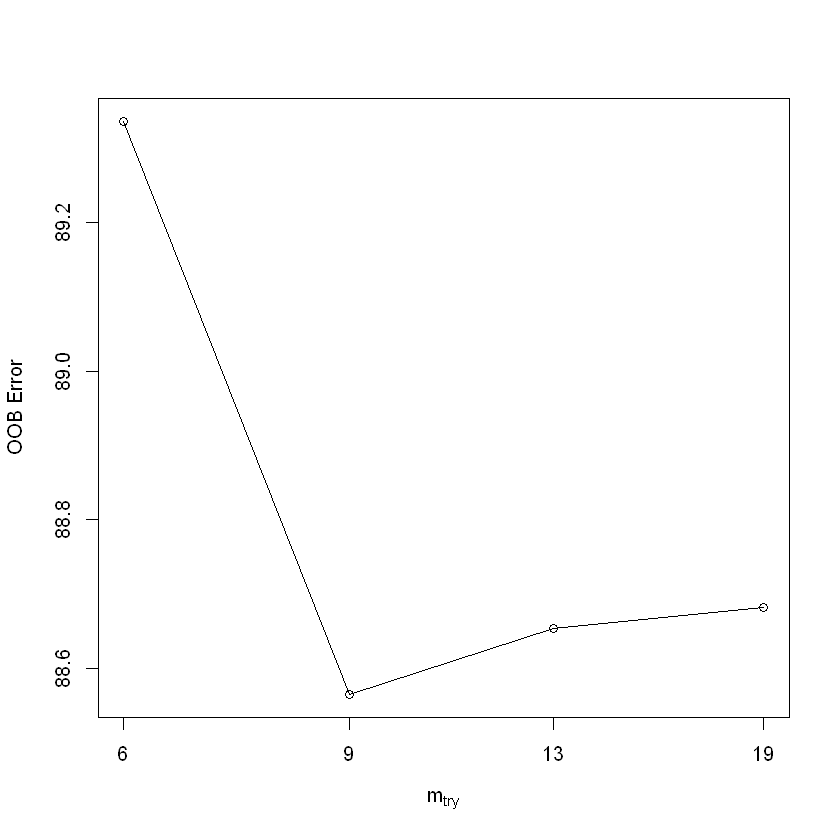

In [79]:
# Algorithm Tune (tuneRF)
set.seed(123)
bestmtry <- tuneRF(x_tune, y_tune, stepFactor=1.5, improve=1e-5, ntree=500)
print(bestmtry)

I can see that using theis method the best mtry has been selected as 9 which reflects the lowest OOB Error. I will now train another RF model using this mtry and check the MSE to see if there is any improvement over the previous model

In [80]:
# Training a Random Forest model using a mtry of 9
rf_mod_9 <- randomForest(critical_temp~., data = Train_Set, importance = TRUE, mtry = 9)

In [81]:
rf_mod_9


Call:
 randomForest(formula = critical_temp ~ ., data = Train_Set, importance = TRUE,      mtry = 9) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 9

          Mean of squared residuals: 88.80385
                    % Var explained: 92.42

In [82]:
# Predicting the new model on test set
pred_rf_9 <- predict(rf_mod_9, Test_Set)

In [83]:
pred_rf_9 <- as.matrix(pred_rf_9)

In [84]:
MSE_rf_9 = mean((pred_rf_9 - Test_Set$critical_temp)^2)
MSE_rf_9

[1] 90.52851

We can see the MSE obtained by this model is not significantly improved, also the % variance explained by this model has not changed at least for this case. which would potentially mean that the features which would be ranked in terms of importance for the random forest model will not significantly change and this could mean we could save computational cost by using the lower number of mtry.

due to the computational cost of running the tuneRF(), I have just explored this method here and will use this optimum mtry obtained here for the final model in later sections

#### Feature Selection

The next step is to use the importance() method to select the top features for my Random Forest modelling stage later. few functions that could be used for this are varImpPlot() and varImp()

from https://stats.stackexchange.com/questions/162465/in-a-random-forest-is-larger-incmse-better-or-worse I read that %IncMSE is the most robust and informative measure. It is the increase in mse of predictions (estimated with out-of-bag-CV) as a result of variable j being permuted (values randomly shuffled). The higher number, the more important the feature is.

base on this I now sort and select the top 23 features for my random forest model the number is to keep consistent with the number of features for linear regression

In [85]:
importance(rf_mod)

,%IncMSE,IncNodePurity
wtd_entropy_ThermalConductivity,34.21566,341788.24
wtd_entropy_Valence,16.47594,1371990.56
std_atomic_mass,36.83827,371744.82
wtd_gmean_Valence,27.35228,630555.93
gmean_fie,31.21922,74696.39
gmean_FusionHeat,14.70981,68039.52
wtd_mean_atomic_mass,37.87512,227082.27
wtd_entropy_fie,22.30958,279843.32
wtd_range_atomic_radius,33.93207,129156.47
std_Valence,25.58714,60440.97


In [86]:
feature_rf <- varImp(rf_mod)

In [87]:
feature_rf <- feature_rf[order(-feature_rf$Overall), ,drop = FALSE]

In [88]:
final_feature_rf <- feature_rf[1:23, , drop=FALSE]

In [89]:
feature_names_rf <- row.names(final_feature_rf)

In [90]:
feature_names_rf

[1] "wtd_mean_atomic_mass"            "std_atomic_mass"                
 [3] "wtd_entropy_ThermalConductivity" "wtd_range_atomic_radius"        
 [5] "wtd_std_FusionHeat"              "wtd_range_atomic_mass"          
 [7] "gmean_fie"                       "wtd_range_FusionHeat"           
 [9] "wtd_range_fie"                   "mean_atomic_radius"             
[11] "wtd_std_atomic_radius"           "wtd_std_Valence"                
[13] "wtd_gmean_ElectronAffinity"      "wtd_gmean_Valence"              
[15] "gmean_ElectronAffinity"          "wtd_std_ElectronAffinity"       
[17] "wtd_mean_ThermalConductivity"    "wtd_entropy_FusionHeat"         
[19] "std_Valence"                     "gmean_ThermalConductivity"      
[21] "mean_FusionHeat"                 "wtd_mean_Valence"               
[23] "entropy_FusionHeat"

Now that I have a list of features for my linear regression and Random forest models it is interesting for me to see how many of the features have been selected as common between the two wrapper techniques I used. also that how many are selected differently between the models...

In [91]:
intersect(feature_names_rf, final_feat)

[1] "wtd_mean_atomic_mass"            "std_atomic_mass"                
 [3] "wtd_entropy_ThermalConductivity" "wtd_std_FusionHeat"             
 [5] "wtd_range_FusionHeat"            "wtd_std_Valence"                
 [7] "wtd_gmean_ElectronAffinity"      "wtd_mean_ThermalConductivity"   
 [9] "wtd_entropy_FusionHeat"          "std_Valence"                    
[11] "gmean_ThermalConductivity"       "entropy_FusionHeat"

In [92]:
setdiff(feature_names_rf, final_feat)

[1] "wtd_range_atomic_radius"  "wtd_range_atomic_mass"   
 [3] "gmean_fie"                "wtd_range_fie"           
 [5] "mean_atomic_radius"       "wtd_std_atomic_radius"   
 [7] "wtd_gmean_Valence"        "gmean_ElectronAffinity"  
 [9] "wtd_std_ElectronAffinity" "mean_FusionHeat"         
[11] "wtd_mean_Valence"

I can see that out of the 23 features remaining, 12 features are common between the two models

- wtd_mean_atomic_mass
- std_atomic_mass
- wtd_entropy_ThermalConductivity
- wtd_std_FusionHeat
- wtd_range_FusionHeat
- wtd_std_Valence
- wtd_gmean_ElectronAffinity
- wtd_mean_ThermalConductivity
- wtd_entropy_FusionHeat
- std_Valence
- gmean_ThermalConductivity
- entropy_FusionHeat

11 are selected as different for the two models, which is consistent with my expectations that different models will use different features to their advantage depending on how they learn and relationship between the features and the output variable

## 3. Modeling and Prediction

now that I have selected my features for the models that I am going to develop. I need to train and test my models on the dataset.

in order to be able to compare the models in an even enviroment and make sure that we are certain about the results of the testing I will use k-folds cross validation in later section to train and test the models on various samples of the data set and compare the results with each other before electing the best one.

but before I choose what model I want to use for my regression I am interested in exploring the relationship between my selected features from lasso regression and the output varieble critical_temp. this could show me what regression tecnique may be suitable for my model.

I will now explore this a bit further...

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


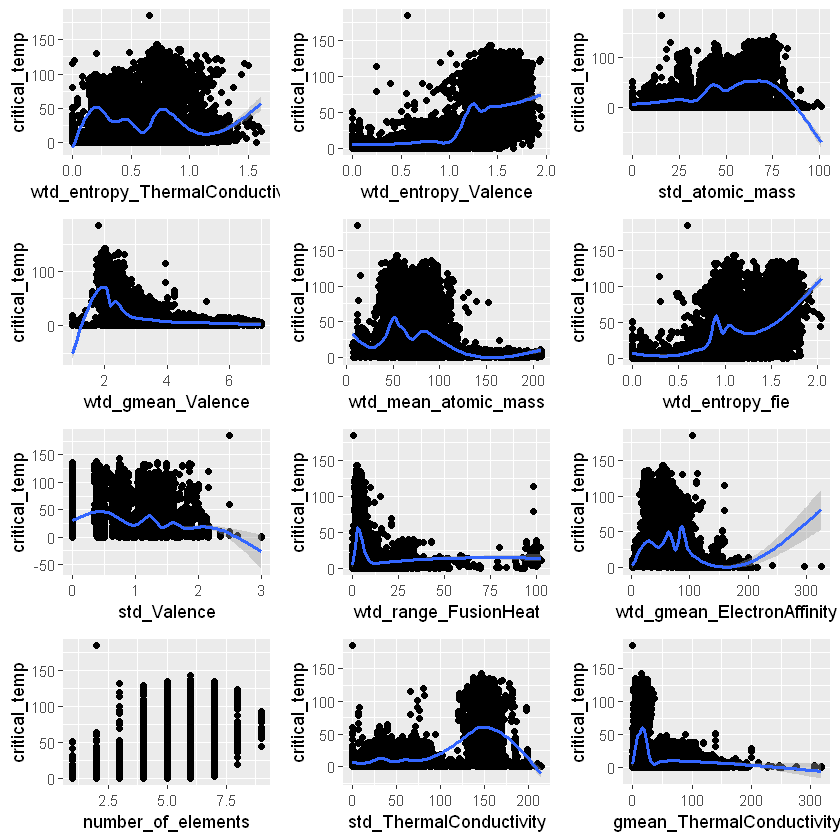

In [93]:
p1 <- ggplot(filt_data, aes(wtd_entropy_ThermalConductivity, critical_temp)) + geom_point() + stat_smooth()
p2 <- ggplot(filt_data, aes(wtd_entropy_Valence, critical_temp)) + geom_point() + stat_smooth()
p3 <- ggplot(filt_data, aes(std_atomic_mass, critical_temp)) + geom_point() + stat_smooth()
p4 <- ggplot(filt_data, aes(wtd_gmean_Valence, critical_temp)) + geom_point() + stat_smooth()
p5 <- ggplot(filt_data, aes(wtd_mean_atomic_mass, critical_temp)) + geom_point() + stat_smooth()
p6 <- ggplot(filt_data, aes(wtd_entropy_fie, critical_temp)) + geom_point() + stat_smooth()
p7 <- ggplot(filt_data, aes(std_Valence, critical_temp)) + geom_point() + stat_smooth()
p8 <- ggplot(filt_data, aes(wtd_range_FusionHeat, critical_temp)) + geom_point() + stat_smooth()
p9 <- ggplot(filt_data, aes(wtd_gmean_ElectronAffinity, critical_temp)) + geom_point() + stat_smooth()
p10 <- ggplot(filt_data, aes(number_of_elements, critical_temp)) + geom_point() + stat_smooth()
p11 <- ggplot(filt_data, aes(std_ThermalConductivity, critical_temp)) + geom_point() + stat_smooth()
p12 <- ggplot(filt_data, aes(gmean_ThermalConductivity, critical_temp)) + geom_point() + stat_smooth()

grid.arrange(p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12, ncol=3)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


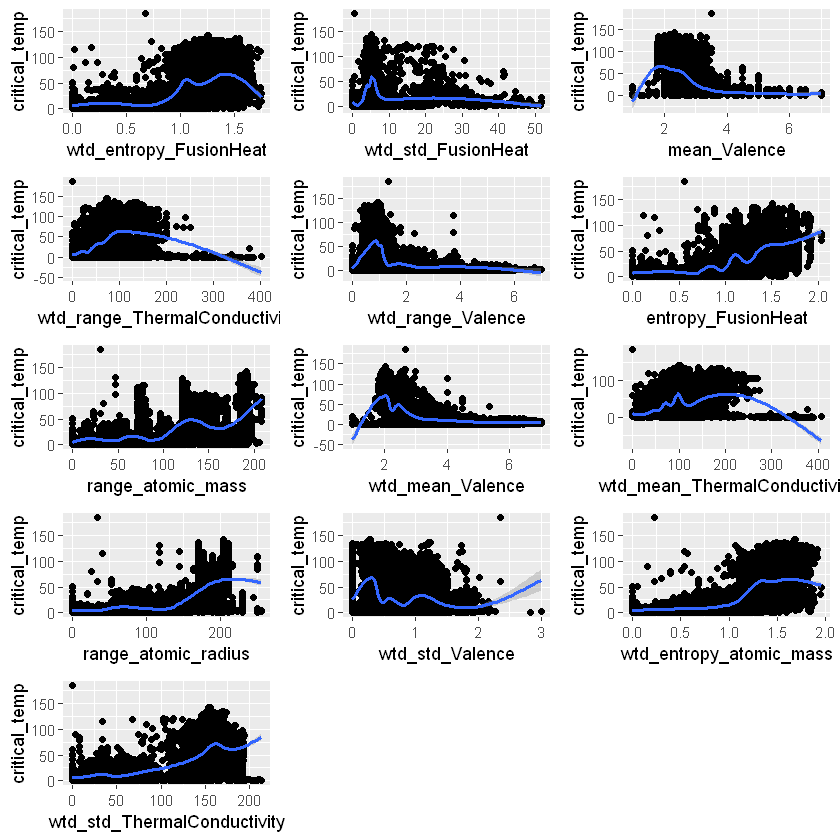

In [94]:
p13 <- ggplot(filt_data, aes(wtd_entropy_FusionHeat, critical_temp)) + geom_point() + stat_smooth()
p14 <- ggplot(filt_data, aes(wtd_std_FusionHeat, critical_temp)) + geom_point() + stat_smooth()
p15 <- ggplot(filt_data, aes(mean_Valence, critical_temp)) + geom_point() + stat_smooth()
p16 <- ggplot(filt_data, aes(wtd_range_ThermalConductivity, critical_temp)) + geom_point() + stat_smooth()
p17 <- ggplot(filt_data, aes(wtd_range_Valence, critical_temp)) + geom_point() + stat_smooth()
p18 <- ggplot(filt_data, aes(entropy_FusionHeat, critical_temp)) + geom_point() + stat_smooth()
p19 <- ggplot(filt_data, aes(range_atomic_mass, critical_temp)) + geom_point() + stat_smooth()
p20 <- ggplot(filt_data, aes(wtd_mean_Valence, critical_temp)) + geom_point() + stat_smooth()
p21 <- ggplot(filt_data, aes(wtd_mean_ThermalConductivity, critical_temp)) + geom_point() + stat_smooth()
p22 <- ggplot(filt_data, aes(range_atomic_radius, critical_temp)) + geom_point() + stat_smooth()
p23 <- ggplot(filt_data, aes(wtd_std_Valence, critical_temp)) + geom_point() + stat_smooth()
p24 <- ggplot(filt_data, aes(wtd_entropy_atomic_mass, critical_temp)) + geom_point() + stat_smooth()
p25 <- ggplot(filt_data, aes(wtd_std_ThermalConductivity, critical_temp)) + geom_point() + stat_smooth()

grid.arrange(p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25, ncol=3)

looking at the relationship of the features with the response variable above we can see a lot of non-linear trends in the relationship, This could mean that the bias resulted from fitting a simple linear model may not allow the model to perform well when introduced with new data and in general may not be enough flexible to fit the training data well, the other option would be to use higher order polynomials train and test the model and keep changing the order of the polynomial used to reach the desired performance levels (MSE, $R^2$, etc.) this can in turn also present its own challenges computational complexity and result in an overfit scenerio.

for these reasons and after studying for a while, I have decided to try and fit a linear regression model as a base to my data with the selected featured and I will then compare that to a GAM model which can generaly provide an additive model extending the standard linear model by allowing non-linear functions of each of the variables and introducing some flexibility.

in the next steps I will try to explore these two options first.

### 3.1 Linear Regression Model

I will now fit a simple linear regression model based on the 23 selected features and use it to predict on the test data to serve as the base of my models.
I will use the test and train spliting method below

In [95]:
final_feat <- c(final_feat, 'critical_temp')
lr_mod_data <- filt_data[,final_feat]

In [96]:
dim(lr_mod_data)

[1] 21263    24

In [97]:
set.seed(13)
train <- sample(nrow(lr_mod_data), 0.75*nrow(lr_mod_data), replace = FALSE)
Train_Set <- lr_mod_data[train,]
Test_Set <- lr_mod_data[-train,]

In [98]:
lr.mod <- lm(critical_temp ~ ., data = Train_Set)
summary(lr.mod)


Call:
lm(formula = critical_temp ~ ., data = Train_Set)

Residuals:
    Min      1Q  Median      3Q     Max 
-75.124 -12.336  -0.522  13.392 216.641 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      17.125050   1.567452  10.925  < 2e-16 ***
wtd_entropy_ThermalConductivity  14.531963   1.223138  11.881  < 2e-16 ***
wtd_entropy_Valence             -22.526290   3.149624  -7.152 8.92e-13 ***
std_atomic_mass                  -0.468072   0.041839 -11.187  < 2e-16 ***
wtd_mean_atomic_mass             -0.016438   0.007127  -2.306 0.021110 *  
wtd_entropy_fie                  -1.794252   1.828314  -0.981 0.326425    
std_Valence                       4.958900   0.833919   5.946 2.80e-09 ***
wtd_range_FusionHeat              0.136874   0.026835   5.101 3.42e-07 ***
wtd_gmean_ElectronAffinity       -0.164722   0.006228 -26.448  < 2e-16 ***
number_of_elements               -1.090201   0.419284  -2.600 0.009327 ** 
std_Therm

The adjusted R-squared ($R^2$) value indicates this model explains 67% of the variation in the critical temperature.

The F-statistic 1403 has a p-value < 2.2e-16 which means rejecting the null hypothesis (the model explains nothing) which indicates the model is somewhat useful

The p-values for the coefficients show most of the features chosen by the lasso stage are significant at the 0.05 level except for one feature.

I will stick to this model as the final model for my linear regression

lets plot the residuals ...

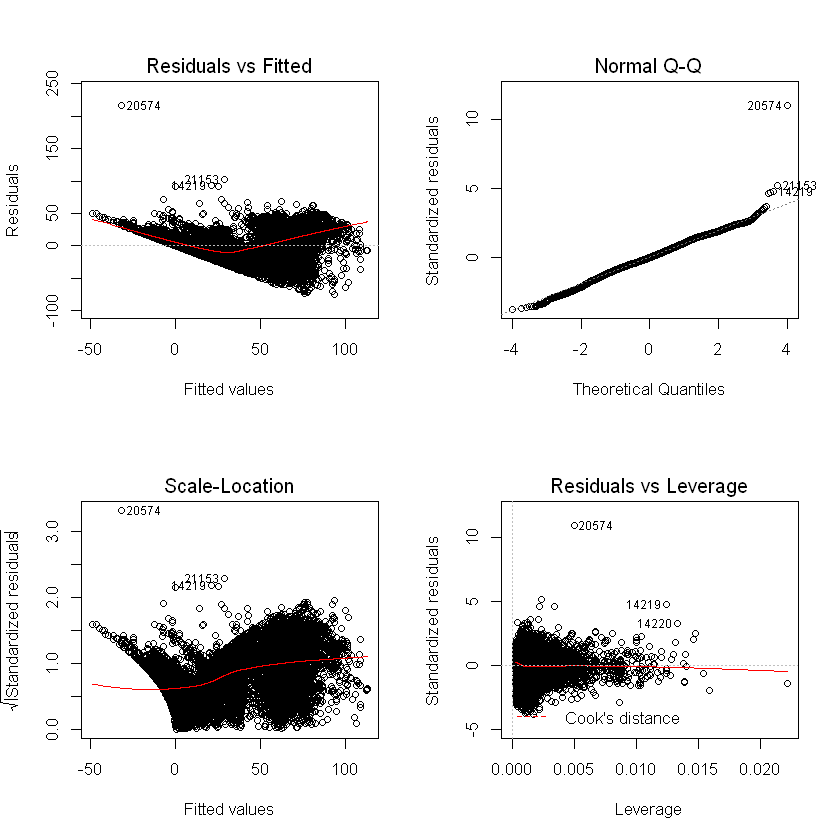

In [99]:
par(mfrow=c(2,2))
plot(lr.mod)

The model plots show:
- Residual vs Fitted - shows the residuals are not so evenly distributed around zero, they also funnel out as the fitted value increases. This model violates the assumption of homoscedasticity - the error terms change along the regression line
- Normal Q-Q - the residuals seem to be fitted on the line, indicating the residuals are normally distributed
- Scale-Location - The chart shows the model somewhat holds true to the assumption of equal variance
- Residuals vs Leverage - The chart shows there is not any influential outlier outside of the cook's distance

Lets now use the model to perform prediction on the test set and calculate the MSE

In [100]:
set.seed(13)
lr.pred = predict(lr.mod, newdata = Test_Set)

In [101]:
MSE_lr = mean((lr.pred - Test_Set$critical_temp)^2)
MSE_lr

[1] 373.6787

### 3.2 Generalized Additive Models (GAM)

As discussed before I intend to try another regression technique that introduces more flexibility than linear regression 

a few sources which I studied for using this model are mentioned below

* http://environmentalcomputing.net/intro-to-gams/
* http://www.sthda.com/english/articles/40-regression-analysis/162-nonlinear-regression-essentials-in-r-polynomial-and-spline-regression-models/
* http://www.statsoft.com/Textbook/Generalized-Additive-Models
* ISLR text book 2013 edition - Chapter 7 section 7.7 Generalized Additive Models

of the main advantages of this model is that GAMs allow us to fit a non-linear function to each variable so that we can
automatically model non-linear relationships that standard linear regression will miss. This means that we do not need to manually try out many different transformations on each variable individually.

I will use the gam() package to build and train a GAM model below based on using default degrees of freedom for my smoothing splines on all the features which demonstrate non-linear relationship to my predictor observed in previous steps

In [102]:
#install.packages('gam')
library(gam)

Loading required package: splines
Loaded gam 1.16.1


Attaching package: 'gam'

The following objects are masked from 'package:mgcv':

    gam, gam.control, gam.fit, s



In [103]:
gam.mod <- gam(critical_temp ~ s(wtd_entropy_ThermalConductivity) + s(wtd_mean_atomic_mass)
               + s(std_Valence) + s(wtd_gmean_ElectronAffinity) + s(std_ThermalConductivity)
               + s(wtd_entropy_FusionHeat) + s(mean_Valence) + s(wtd_range_Valence) + s(entropy_FusionHeat)
               + s(range_atomic_mass) + s(wtd_std_Valence) + s(wtd_entropy_Valence) + s(std_atomic_mass)
               + s(wtd_entropy_fie) + s(wtd_range_FusionHeat) + s(number_of_elements) + s(gmean_ThermalConductivity)
               + s(wtd_std_FusionHeat) + s(wtd_range_ThermalConductivity) + s(wtd_mean_ThermalConductivity)
               + s(range_atomic_radius) + s(wtd_entropy_atomic_mass)+ s(wtd_std_ThermalConductivity), data = Train_Set)

In [104]:
summary(gam.mod)


Call: gam(formula = critical_temp ~ s(wtd_entropy_ThermalConductivity) + 
    s(wtd_mean_atomic_mass) + s(std_Valence) + s(wtd_gmean_ElectronAffinity) + 
    s(std_ThermalConductivity) + s(wtd_entropy_FusionHeat) + 
    s(mean_Valence) + s(wtd_range_Valence) + s(entropy_FusionHeat) + 
    s(range_atomic_mass) + s(wtd_std_Valence) + s(wtd_entropy_Valence) + 
    s(std_atomic_mass) + s(wtd_entropy_fie) + s(wtd_range_FusionHeat) + 
    s(number_of_elements) + s(gmean_ThermalConductivity) + s(wtd_std_FusionHeat) + 
    s(wtd_range_ThermalConductivity) + s(wtd_mean_ThermalConductivity) + 
    s(range_atomic_radius) + s(wtd_entropy_atomic_mass) + s(wtd_std_ThermalConductivity), 
    data = Train_Set)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-74.4459  -8.9673   0.6374  10.8766 195.4590 

(Dispersion Parameter for gaussian family taken to be 293.5096)

    Null Deviance: 18912993 on 15946 degrees of freedom
Residual Deviance: 4653301 on 15854 degrees of freedom
AIC: 1

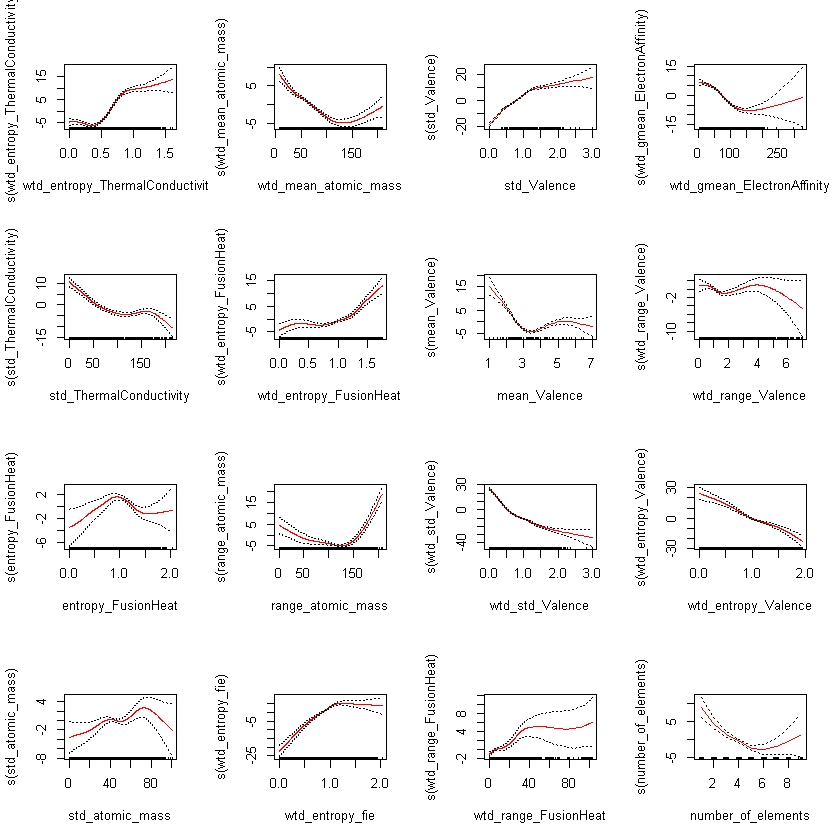

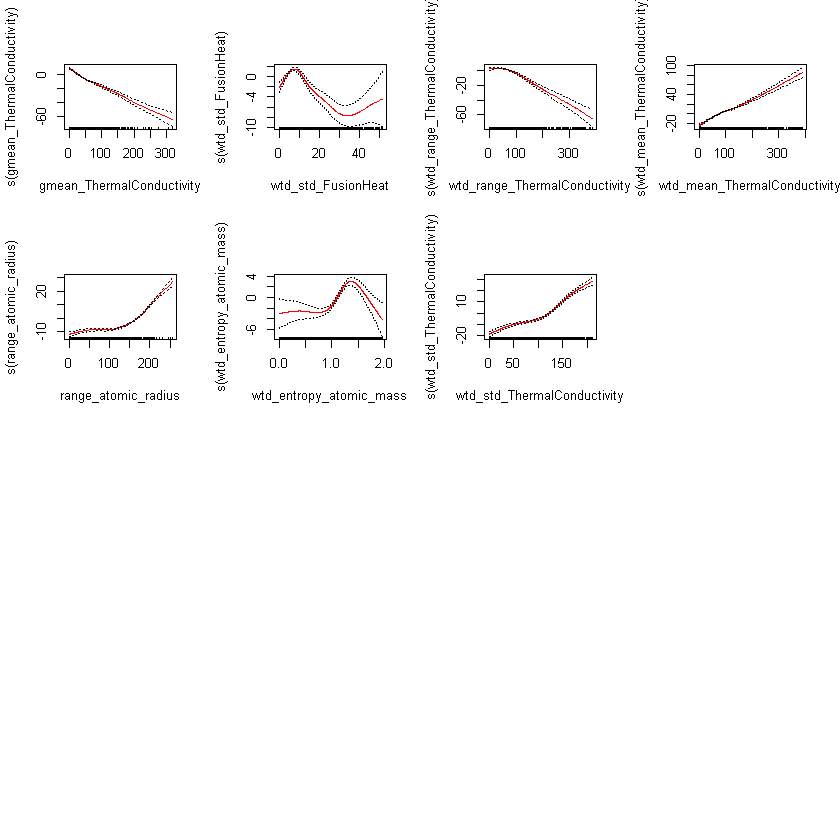

In [105]:
par(mfrow =c(4,4))
plot(gam.mod, se=TRUE ,col ="red")

We can see the spline fitted functions applied to each feature in the model in the above figure to help model the non-linearities in our data and smoothness of the fitted curve

In [106]:
# Predicting and calculating the MSE of the model
set.seed(13)
gam.pred <- predict(gam.mod, newdata = Test_Set)
MSE_gam = mean((gam.pred - Test_Set$critical_temp)^2)
MSE_gam

[1] 279.431

We can see the MSE for the GAM model has decreased almost by 25% compared to that of the Linear regression model which means the smoothing splines have improved the predicting capability of out models by modelling the non-linearities of the output variable with that of the features.

### 3.3 Random Forest Model

Next I will train the random forest model with the features that was selected from the importance method in previous section.
I will first similar to above split the data in to train and test sets.

also I will be using a mtry of 9 as discovered in previous section

In [107]:
feature_names_rf_plus <- c(feature_names_rf, 'critical_temp')
rf_model_data <- filt_data[,feature_names_rf_plus]

In [108]:
dim(rf_model_data)

[1] 21263    24

In [109]:
set.seed(10)
train <- sample(nrow(rf_model_data), 0.75*nrow(rf_model_data), replace = FALSE)
train_set <- rf_model_data[train,]
test_set <- rf_model_data[-train,]

In [110]:
# training a random forest model with default number of trees 500 and a mtry of 9
rf.mod <- randomForest(critical_temp~., data = train_set, importance = TRUE, mtry = 9)

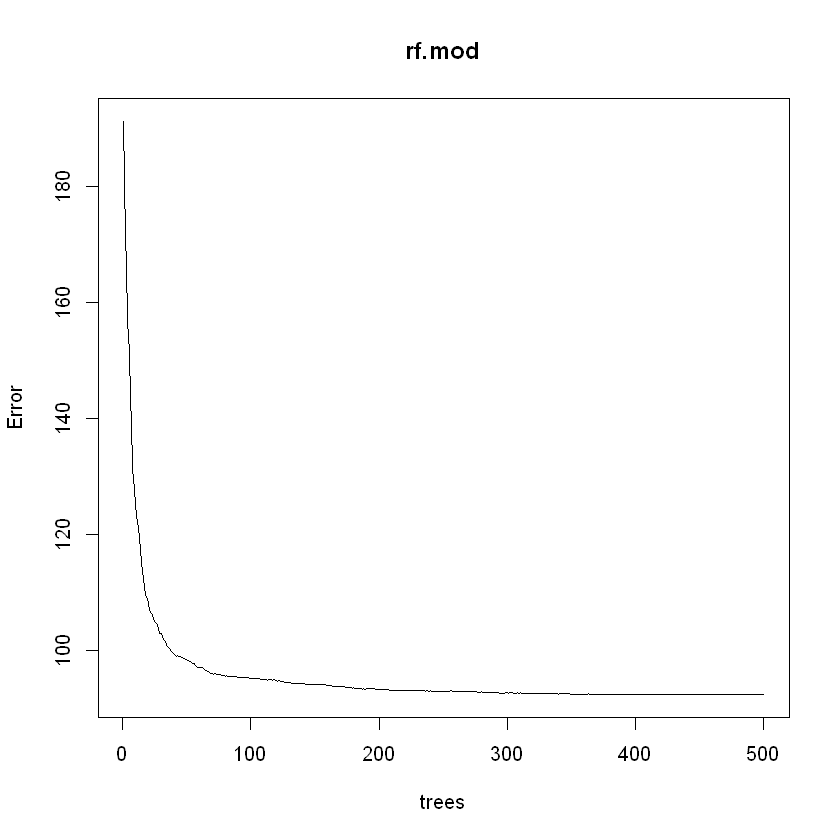

In [111]:
plot(rf.mod)

Checking the plot above we can see the deafult number of trees is good enough as the error doesn't get reduces with increasing this number, infact we can lower this number to maybe around 200 and would still get the same result with better performance

In [112]:
rf.mod


Call:
 randomForest(formula = critical_temp ~ ., data = train_set, importance = TRUE,      mtry = 9) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 9

          Mean of squared residuals: 92.33906
                    % Var explained: 92.11

We can also see that using this model around 92% of the varience within our target variable has been explained which is a very significant improvement over the previous models. next I will perform prediction using the Random Forest model generated and will test the MSE of this model on the test split we created before

In [113]:
set.seed(10)
rf.pred = predict(rf.mod, newdata = test_set)

In [114]:
MSE_rf = mean((rf.pred - test_set$critical_temp)^2)
MSE_rf

[1] 94.26497

As expected the MSE of this model is very low compared to previous models, which seems to be a strong performer and the winning model amongst the three.

However in order to be more certain about the results, I will now perform the testing of the three models using K-folds cross validation to make sure the results I have obtained are statistically reliable and not obtained by chance.

## 4. Cross-validation

In order to apply cross-validation to test the three models in an even condition I will use the developed package for this purpose in caret, I have taken this method from below references

* https://machinelearningmastery.com/tune-machine-learning-algorithms-in-r/
* https://stackoverflow.com/questions/41663516/caret-package-cross-validating-gam-with-both-smooth-and-linear-predictors
* https://quantdev.ssri.psu.edu/tutorials/cross-validation-tutorial

When comparing the models three metrics are used to asses and compare the performance of the models these are
- RMSE (Root Mean Squared Error)
- Rsquared
- MAE (Mean Absolute Error)


### 4.1 Cross-validation on linear regression

first lets use cross validation with linear regression

In [115]:
# first set up the number of folds for cross-validation by defining the training control. In this case, we chose 5 folds
set.seed(123)
data_ctrl <- trainControl(method = "cv", number = 10)

In [116]:
lr_model_caret <- train(critical_temp ~ ., data = lr_mod_data, trControl = data_ctrl, method = "lm") 

In [117]:
lr_model_caret

Linear Regression 

21263 samples
   23 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 19136, 19137, 19137, 19137, 19136, 19137, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  19.69972  0.6693932  15.48982

Tuning parameter 'intercept' was held constant at a value of TRUE

In [118]:
lr_model_caret$resample

RMSE,Rsquared,MAE,Resample
19.70118,0.6752328,15.49205,Fold01
19.45241,0.6788538,15.34686,Fold02
19.91501,0.6618479,15.74442,Fold03
19.85993,0.6691434,15.65385,Fold04
19.44535,0.6672068,15.42115,Fold05
19.34611,0.6784129,15.20958,Fold06
19.69268,0.6761201,15.54920,Fold07
20.22019,0.6550029,15.44975,Fold08
20.13044,0.6541542,15.81272,Fold09
19.23388,0.6779574,15.21863,Fold10


In [119]:
sd(lr_model_caret$resample$Rsquared)

[1] 0.009572184

We can see the standard deviation of the Rsquared which is very small and shows the model is performing consistant on various folds of the data

In [120]:
# read in the model performance metrics
lr_cv_metrics <- lr_model_caret$resample

### 4.2 Cross-validation on GAM

now we apply the same train control to the GAM model

In [121]:
gam_model_caret <- train(critical_temp ~ ., data = lr_mod_data, trControl = data_ctrl, method = "gam") 

In [122]:
gam_model_caret

Generalized Additive Model using Splines 

21263 samples
   23 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 19137, 19137, 19137, 19135, 19137, 19137, ... 
Resampling results across tuning parameters:

  select  RMSE      Rsquared   MAE     
  FALSE   16.01176  0.7815013  11.93612
   TRUE   16.01194  0.7814944  11.93285

Tuning parameter 'method' was held constant at a value of GCV.Cp
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were select = FALSE and method = GCV.Cp.

In [123]:
gam_model_caret$resample

RMSE,Rsquared,MAE,Resample
15.94066,0.7892388,11.88512,Fold01
15.83092,0.7877404,11.85567,Fold02
15.93296,0.7811413,11.85929,Fold03
16.67957,0.7577004,12.47723,Fold04
15.82775,0.7869561,11.87466,Fold05
16.22494,0.7728454,12.00450,Fold06
15.47133,0.7976781,11.56377,Fold07
16.21530,0.7746560,12.09117,Fold08
16.14120,0.7810696,11.83191,Fold09
15.85300,0.7859866,11.91786,Fold10


In [124]:
sd(gam_model_caret$resample$Rsquared)

[1] 0.01105007

again here we can see the standard deviation of the Rsquared of each fold is 0.01 which shows the consistency of the model on each fold of the data however not as consistent as the Linear regression model 

In [125]:
# read in the model performance metrics
gam_cv_metrics <- gam_model_caret$resample

### 4.3 Cross-validation on Random Forest

now we apply the same train control to the GAM model

In [126]:
mtry = 9
tunegrid <- expand.grid(.mtry=mtry)
rf_model_caret <- train(critical_temp ~ ., data = rf_model_data, tuneGrid=tunegrid, trControl = data_ctrl, method = "rf")

In [127]:
rf_model_caret

Random Forest 

21263 samples
   23 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 19136, 19138, 19137, 19136, 19137, 19137, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  9.296032  0.9264165  5.194147

Tuning parameter 'mtry' was held constant at a value of 9

In [128]:
rf_model_caret$resample

RMSE,Rsquared,MAE,Resample
8.859629,0.9329182,5.192368,Fold01
8.893121,0.9316921,5.053472,Fold02
8.956009,0.9335551,5.127544,Fold03
9.260849,0.9257014,5.222042,Fold04
10.158436,0.9147397,5.307483,Fold05
9.719962,0.9188628,5.220142,Fold06
9.224607,0.9260192,5.125722,Fold07
9.606397,0.9200298,5.340114,Fold08
8.979474,0.9323323,5.140049,Fold09
9.301840,0.9283142,5.212533,Fold10


In [129]:
sd(rf_model_caret$resample$Rsquared)

[1] 0.006620891

the standard deviation of the R-squared for the random forest model applied to different folds of the data is 0.005 which shows this model applied to various folds of the data is performing quite consistent compared to the previous two models

In [130]:
# read in the model performance metrics
rf_cv_metrics <- rf_model_caret$resample

The above results clearly shows the achieved R-squared of a Random Forest model at 92.4% and a RMSE of 9.5 which is clearly the winning model out of the three models compared using cross-fold validation

### 4.4 Comparing the models

Here I will look at the RMSE obtained from all three models using the 10-fold cross validation step above. I will plot the boxplot of the RMSEs obtained to visualise the final winner of the three models 

In [131]:
RMSE <- data.frame(lr_cv_metrics$RMSE, gam_cv_metrics$RMSE, rf_cv_metrics$RMSE)

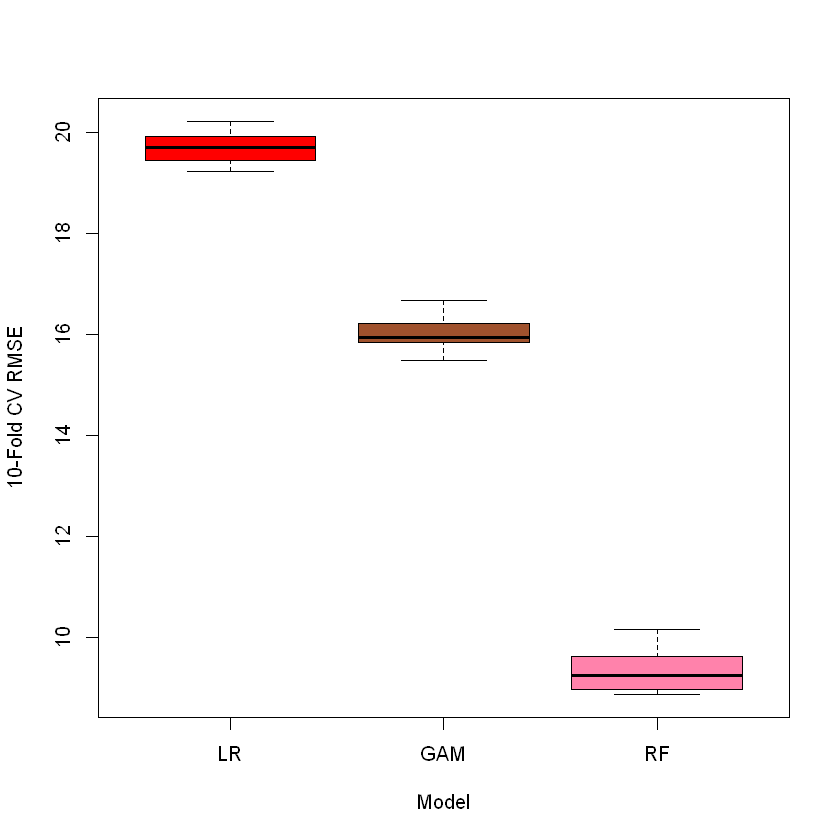

In [132]:
boxplot(RMSE, col = c("red","sienna","palevioletred1"), names = c("LR","GAM","RF"),
        xlab = "Model", ylab = "10-Fold CV RMSE")

## 5. Conclusion

Looking at the RMSE boxplot above we can clearly see that the Random Forest model is achieving a much lower value consistently compared to the other two models, this along with the average Rsquared obtained by this model at 92.6% results in the conclusion that this model outperforms the other two for this dataset.

Now lets have a look at the most influential features within the model, we look at this from two perspectives which are quite similar for this case, Incremental Node purity and incremental MSE.

We sot the obtained dataframe from the importance method by both indicators and show bar plots of the features from the most important to the least in the 23 feature set that we have selected.

in the final step we train our model on the entire available dataset and calculate the MSE for the predictions which would be the training MSE based on this model

In [133]:
names = dimnames(rf.mod$importance)[[1]]

In [134]:
importance_df <- data.frame(rf.mod$importance, names)

In [135]:
ord_IncMSE <- importance_df[order(-importance_df$X.IncMSE),]
ord_IncNodePurity <- importance_df[order(-importance_df$IncNodePurity),]

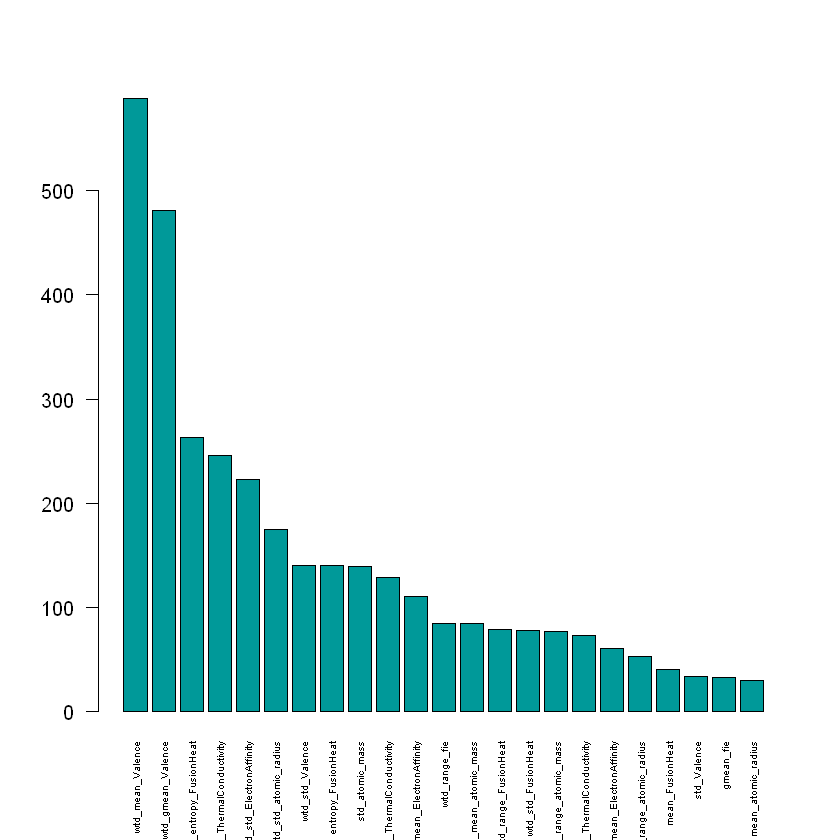

In [136]:
barplot(ord_IncMSE$X.IncMSE, names.arg = ord_IncMSE$names, las=2, cex.names = .5, col = c("#009999"))

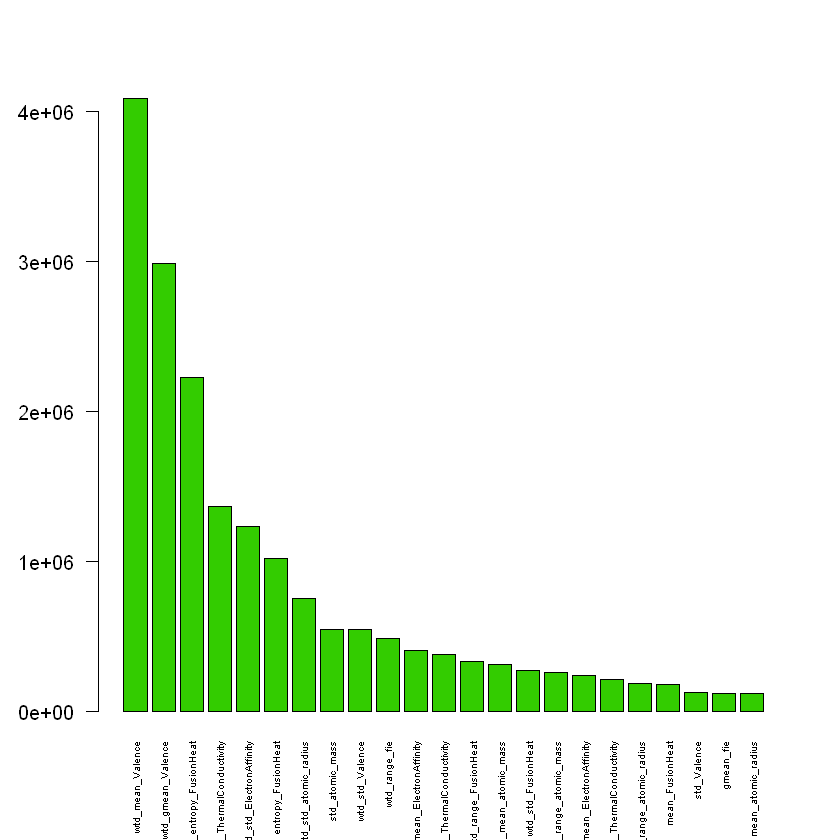

In [137]:
barplot(ord_IncNodePurity$IncNodePurity, names.arg = ord_IncNodePurity$names, las=2, cex.names = .5, col = c("#33cc00"))

Now I will apply the model to the entire dataset and calculate the MSE on this data which is the training data

In [138]:
rf_final <- randomForest(critical_temp~., data = rf_model_data, ntree = 300, importance = FALSE, mtry = 9)

In [139]:
rf_final


Call:
 randomForest(formula = critical_temp ~ ., data = rf_model_data,      ntree = 300, importance = FALSE, mtry = 9) 
               Type of random forest: regression
                     Number of trees: 300
No. of variables tried at each split: 9

          Mean of squared residuals: 85.09089
                    % Var explained: 92.75

In [140]:
set.seed(123)
rf_final_pred = predict(rf_final, newdata = rf_model_data)

In [141]:
MSE_train = mean((rf_final_pred - rf_model_data$critical_temp)^2)
MSE_train

[1] 28.45185

## 6. References

Other resources studied and used for this work include:

* https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/
*  https://www.quora.com/How-does-skewness-impact-regression-model
* http://www.sthda.com/english/wiki/print.php?id=78
* https://machinelearningmastery.com/feature-selection-with-the-caret-r-package/
* https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/
* https://towardsdatascience.com/getting-data-ready-for-modelling-feature-engineering-feature-selection-dimension-reduction-39dfa267b95a
* https://www.rstatisticsblog.com/data-science-in-action/lasso-regression/
* https://stats.stackexchange.com/questions/283952/lasso-and-dimension-reduction/284272
* ISLR Chapter 6 - 6.6.2 Ridge regression and the Lasso
* http://sujayskumar.blogspot.com/2017/02/decision-trees-rf-and-xgboost.html
* https://www.r-bloggers.com/how-to-implement-random-forests-in-r/
* https://www.guru99.com/r-random-forest-tutorial.html
* http://environmentalcomputing.net/intro-to-gams/
* http://www.sthda.com/english/articles/40-regression-analysis/162-nonlinear-regression-essentials-in-r-polynomial-and-spline-regression-models/
* http://www.statsoft.com/Textbook/Generalized-Additive-Models
* ISLR text book 2013 edition - Chapter 7 section 7.7 Generalized Additive Models
* https://machinelearningmastery.com/tune-machine-learning-algorithms-in-r/
* https://stackoverflow.com/questions/41663516/caret-package-cross-validating-gam-with-both-smooth-and-linear-predictors
* https://quantdev.ssri.psu.edu/tutorials/cross-validation-tutorial